<a name="cell-TOC-opt"></a>

$\require{cancel}$

### 7. [Solving Nonlinear](#cell-opt-fx) [$b=g(x)\not=Ax$](#cell-opt-fx) [for Optimization](#cell-opt-fx)

1. [Optimization, Curvature, and Precision](#cell-opt-fx-curvature)
    1. [Minima, Maxima, and the Hessian](#cell-opt-fx-minmax) [$H_{f(\theta)}$](#cell-opt-fx-minmax)
        1. [Multivariate Taylor Series Approximations](#cell-opt-fx-mvtaylor)
    2. [The Jacobian](#cell-opt-jac) [$J$](#cell-opt-jac)   
        1. [The Jacobian, Hessian, and Multi-Multivariate Taylor Series Approximations](#cell-opt-jac-hes)
        2. [Gauss-Newton](#cell-opt-gauss-newton)
2. [The Score Function and Maximum Likelihood Estimation (MLE)](#cell-opt-mles)
    1. [Fisher Information](#cell-opt-fx-fi)
        1. [Fisher Information is another Jacobian inner product Hessian Approximation](#cell-opt-jac-fi)
    2. [Fisher Scoring](#cell-opt-fx-fs)
3. [Netwon's Method](#cell-opt-fx-newton)
    1. [Newton's Method for Mulitivariate Functions](#cell-opt-fx-newton-mulit)
    


<a name="cell-opt-fx1"></a>

# 7 Solving Nonlinear $b=f(x)\not=Ax$ for Optimization ([Return to TOC](#cell-TOC-opt)) 
---

- The generalization of $Ax=b$ is $f(x)=b$ for a ***nonlinear function*** $f$
- where solving ***nonlinear equations*** $\quad f'(x) = 0 \quad \text{ or } \quad \overbrace{\nabla_x f(x) = \mathbf{0}}^{\text{multivariate form}} \quad \text{ means }\textbf{fitting a model} $ 
-  <font style="color:white">by maximizing $f$ if it's a ***likelihood*** <font style="color:white">(AKA doing ***maximum likelihood estimation***)</font></font>
- <font style="color:white">or minimizing $f$ if it's a ***loss function*** <font style="color:white">(like a ***negative log likelihood*** parameterized by as a ***neural network***)</font></font>

<font style="color:white">*Maximum likelihood estimation is central to statistical inference.  Long hours can be invested in learning about the theoretical performance of MLEs and their analytic derivation.  Faced with a complex likelihood lacking analytic solution, however, many people are unsure how to proceed.*</font>

<font style="color:white">*Most functions cannot be optimized analytically. ... Many realistic statistical models induce likelihoods that cannot be optimized analytically -- indeed, we would argue that greater realism is strongly assocaited with the reduced ability to find optima analytically.*</font>

<font style="color:white">Geof Givens and Jennifer Hoeting, Chapter 2 ***Optimizing and Solving Nonlinear Equations*** of **Computational Stastics**.</font>

<a name="cell-opt-fx2"></a>

# 7 Nonlinearity and Optimization $b=f(x)\not=Ax$ ([Return to TOC](#cell-TOC-opt)) 
---

- The generalization of $Ax=b$ is $f(x)=b$ for a ***nonlinear function*** $f$
- where solving ***nonlinear equations*** $\quad f'(x) = 0 \quad \text{ or } \quad \overbrace{\nabla_x f(x) = \mathbf{0}}^{\text{multivariate form}} \quad \text{ means }\textbf{fitting a model} $ 
-  by maximizing $f$ if it's a ***likelihood*** <font style="color:gray">(AKA doing ***maximum likelihood estimation***)</font>
- or minimizing $f$ if it's a ***loss function*** <font style="color:gray">(like a ***negative log likelihood*** parameterized by as a ***neural network***)</font>

<font style="color:white">*Maximum likelihood estimation is central to statistical inference.  Long hours can be invested in learning about the theoretical performance of MLEs and their analytic derivation.  Faced with a complex likelihood lacking analytic solution, however, many people are unsure how to proceed.*</font>

<font style="color:white">*Most functions cannot be optimized analytically. ... Many realistic statistical models induce likelihoods that cannot be optimized analytically -- indeed, we would argue that greater realism is strongly assocaited with the reduced ability to find optima analytically.*</font>

<font style="color:white">Geof Givens and Jennifer Hoeting, Chapter 2 ***Optimizing and Solving Nonlinear Equations*** of **Computational Stastics**.</font>

<a name="cell-opt-fx"></a>

# 7 Nonlinearity and Optimization $b=f(x)\not=Ax$ ([Return to TOC](#cell-TOC-opt)) 
---

- The generalization of $Ax=b$ is $f(x)=b$ for a ***nonlinear function*** $f$
- where solving ***nonlinear equations*** $\quad f'(x) = 0 \quad \text{ or } \quad \overbrace{\nabla_x f(x) = \mathbf{0}}^{\text{multivariate form}} \quad \text{ means }\textbf{fitting a model} $ 
-  by maximizing $f$ if it's a ***likelihood*** <font style="color:gray">(AKA doing ***maximum likelihood estimation***)</font>
- or minimizing $f$ if it's a ***loss function*** <font style="color:gray">(like a ***negative log likelihood*** parameterized by as a ***neural network***)</font>

<font style="color:gray">*Maximum likelihood estimation is central to statistical inference.  Long hours can be invested in learning about the theoretical performance of MLEs and their analytic derivation.  Faced with a complex likelihood lacking analytic solution, however, many people are unsure how to proceed.*</font>

<font style="color:gray">*Most functions cannot be optimized analytically. ... Many realistic statistical models induce likelihoods that cannot be optimized analytically -- indeed, we would argue that greater realism is strongly assocaited with the reduced ability to find optima analytically.*</font>

<font style="color:gray">Geof Givens and Jennifer Hoeting, Chapter 2 ***Optimizing and Solving Nonlinear Equations*** of **Computational Stastics**.</font>

<a name="cell-opt-fx-curvature1"></a>
## 7.1 Optimization, Curvature, and Precision ([Return to TOC](#cell-TOC-opt)) 
---
***Critical points*** (***optimization solutions***) of a function $f'(x^*)=0$ are found within regions of curvature of $f$; whereas, the ***roots*** of the function $f(x_0)=0$ need not be...

- ***Curvature*** causes ***numerical precision*** for ***optimization*** to be worse than for ***root-finding*** contexts 
<!--The ***derivative*** $f'(z)$ is just a another function $g(z)$; so, e.g., the ***first-order Taylor series approximation*** of $f'$ is simply 
$$\quad f'(x) = g(x) \approx g(x_0) + (x-x_0)g'(x_0) = f'(x_0) + (x-x_0)f''(x_0)$$-->

<font style="color:white">The ***curvature*** in question however is seen in the ***second order Taylor series approximation***</font>

<font style="color:white">$$f(x) \approx f(\tilde x) + (x - \tilde x) f'(\tilde x) + f''(\tilde x)\frac{(x-\tilde x)^2}{2}$$</font>

- <font style="color:white">numerical precision near ***root*** $x_0$ is limited by the linear term $(\underbrace{x-\tilde x}_{\epsilon_{machine}})f'(\tilde x)$ since in general $f'(\tilde x \approx x_0) \neq 0$</font>

- <font style="color:white">but numerical precision near ***(critical point) optimum*** $x^*$  depends on $\frac{1}{2}(\underbrace{x-\tilde x}_{\sqrt{\epsilon_{machine}}})^2f''(\tilde x)$ since $f'(\tilde x \approx x^*)\approx 0$</font>

<font style="color:white">The $(x-\tilde x)^2$ term evaluated near an ***optimization problem solution*** $x^*$ supports about half of the precision of $(x-\tilde x)$, e.g., $\sqrt{0.0001}=0.01$),
of the ***numerical precision*** of $f(x) \approx g_{x_0}(x)$ evaluated near one of its ***roots*** $x_0$</font>


<a name="cell-opt-fx-curvature2"></a>
## 7.1 Optimization, Curvature, and Precision ([Return to TOC](#cell-TOC-opt)) 
---
***Critical points*** (***optimization solutions***) of a function $f'(x^*)=0$ are found within regions of curvature of $f$; whereas, the ***roots*** of the function $f(x_0)=0$ need not be...

- ***Curvature*** causes ***numerical precision*** for ***optimization*** to be worse than for ***root-finding*** contexts 
<!--The ***derivative*** $f'(z)$ is just a another function $g(z)$; so, e.g., the ***first-order Taylor series approximation*** of $f'$ is simply 
$$\quad f'(x) = g(x) \approx g(x_0) + (x-x_0)g'(x_0) = f'(x_0) + (x-x_0)f''(x_0)$$-->

The ***curvature*** in question however is seen in the ***second order Taylor series approximation***</font>

$$f(x) \approx f(\tilde x) + (x - \tilde x) f'(\tilde x) + f''(\tilde x)\frac{(x-\tilde x)^2}{2}$$</font>

- <font style="color:white">numerical precision near ***root*** $x_0$ is limited by the linear term $(\underbrace{x-\tilde x}_{\epsilon_{machine}})f'(\tilde x)$ since in general $f'(\tilde x \approx x_0) \neq 0$</font>

- <font style="color:white">but numerical precision near ***(critical point) optimum*** $x^*$  depends on $\frac{1}{2}(\underbrace{x-\tilde x}_{\sqrt{\epsilon_{machine}}})^2f''(\tilde x)$ since $f'(\tilde x \approx x^*)\approx 0$</font>

<font style="color:white">The $(x-\tilde x)^2$ term evaluated near an ***optimization problem solution*** $x^*$ supports about half of the precision of $(x-\tilde x)$, e.g., $\sqrt{0.0001}=0.01$),
of the ***numerical precision*** of $f(x) \approx g_{x_0}(x)$ evaluated near one of its ***roots*** $x_0$</font>


<a name="cell-opt-fx-curvature3"></a>
## 7.1 Optimization, Curvature, and Precision ([Return to TOC](#cell-TOC-opt)) 
---
***Critical points*** (***optimization solutions***) of a function $f'(x^*)=0$ are found within regions of curvature of $f$; whereas, the ***roots*** of the function $f(x_0)=0$ need not be...

- ***Curvature*** causes ***numerical precision*** for ***optimization*** to be worse than for ***root-finding*** contexts 
<!--The ***derivative*** $f'(z)$ is just a another function $g(z)$; so, e.g., the ***first-order Taylor series approximation*** of $f'$ is simply 
$$\quad f'(x) = g(x) \approx g(x_0) + (x-x_0)g'(x_0) = f'(x_0) + (x-x_0)f''(x_0)$$-->

The ***curvature*** in question however is seen in the ***second order Taylor series approximation***</font>

$$f(x) \approx f(\tilde x) + (x - \tilde x) f'(\tilde x) + f''(\tilde x)\frac{(x-\tilde x)^2}{2}$$</font>

- numerical precision near ***root*** $x_0$ is limited by the linear term $(\underbrace{x-\tilde x}_{\epsilon_{machine}})f'(\tilde x)$ since in general $f'(\tilde x \approx x_0) \neq 0$

- but numerical precision near ***(stationary point) optimum*** $x^*$  depends on $\frac{1}{2}(\underbrace{x-\tilde x}_{\sqrt{\epsilon_{machine}}})^2f''(\tilde x)$ since $f'(\tilde x \approx x^*)\approx 0$

<font style="color:white">The $(x-\tilde x)^2$ term evaluated near an ***optimization problem solution*** $x^*$ supports about half of the precision of $(x-\tilde x)$, e.g., $\sqrt{0.0001}=0.01$),
of the ***numerical precision*** of $f(x) \approx g_{x_0}(x)$ evaluated near one of its ***roots*** $x_0$</font>


<a name="cell-opt-fx-curvature"></a>
## 7.1 Optimization, Curvature, and Precision ([Return to TOC](#cell-TOC-opt)) 
---
***Critical points*** (***optimization solutions***) of a function $f'(x^*)=0$ are found within regions of curvature of $f$; whereas, the ***roots*** of the function $f(x_0)=0$ need not be...

- ***Curvature*** causes ***numerical precision*** for ***optimization*** to be worse than for ***root-finding*** contexts 
<!--The ***derivative*** $f'(z)$ is just a another function $g(z)$; so, e.g., the ***first-order Taylor series approximation*** of $f'$ is simply 
$$\quad f'(x) = g(x) \approx g(x_0) + (x-x_0)g'(x_0) = f'(x_0) + (x-x_0)f''(x_0)$$-->

The ***curvature*** in question however is seen in the ***second order Taylor series approximation*** 

$$f(x) \approx f(\tilde x) + (x - \tilde x) f'(\tilde x) + f''(\tilde x)\frac{(x-\tilde x)^2}{2}$$

- numerical precision near ***root*** $x_0$ is limited by the linear term $(\underbrace{x-\tilde x}_{\epsilon_{machine}})f'(\tilde x)$ since in general $f'(\tilde x \approx x_0) \neq 0$

- but numerical precision near ***(stationary point) optimum*** $x^*$  depends on $\frac{1}{2}(\underbrace{x-\tilde x}_{\sqrt{\epsilon_{machine}}})^2f''(\tilde x)$ since $f'(\tilde x \approx x^*)\approx 0$

The $(x-\tilde x)^2$ term evaluated near an ***optimization problem solution*** $x^*$ supports about half of the precision of $(x-\tilde x)$, e.g., $\sqrt{0.0001}=0.01$),
of the ***numerical precision*** of $f(x) \approx g_{x_0}(x)$ evaluated near one of its ***roots*** $x_0$


<a name="cell-opt-fx-minmax1"></a>
## 7.1.A Minima, Maxima, and the Hessian $H_{f(z')}$ ([Return to TOC](#cell-TOC-opt)) 
---

The ***Hessian*** is the ordered (***symmetric***) collection of ***second order partial derivatives*** defining ***curvature*** of $f$ at point $z'$ 

$$
\begin{align*}
[H_{f(z')}]_{ij} = \frac{\partial^2 f(z')}{\partial z_i\partial z_j}
 \quad \text{ so } \quad 
 H_{f(z')} = {} & \left[ \begin{array}{ccc}
\frac{\partial^2 f(z')}{\partial z_1\partial z_1} & \cdots & \frac{\partial^2 f(z')}{\partial z_1\partial z_p}\\
\vdots & \ddots & \vdots \\
\frac{\partial^2 f(z')}{\partial z_p\partial z_1} & \cdots & \frac{\partial^2 f(z')}{\partial z_p\partial z_p}
\end{array} \right] = \underset{\text{be discussed}}{\underbrace{J\nabla_z f(z')}_{\text{Jacobian $J$ to}}} \\\\
= {} &\left[ \frac{\partial}{\partial z_1}\nabla_z f(z') \;\;\cdots\;\; \frac{\partial}{\partial z_k}\nabla_z f(z') \;\;\cdots\;\; \frac{\partial}{\partial z_p}\nabla_z f(z') \right]
\end{align*}$$

<font style="color:white">***Curvature*** $H_{f(z^*)} \quad$ not $\nabla_z f(z^*) = \mathbf{0}\quad$ distinguish between ***minima*** and ***maxima*** where $z^*$ will be a (local)</font>
- <font style="color:white">***maximum*** if $H_{f(z^*)}$ is ***negative semi-definite*** $x^T H_{f(z^*)} x \leq 0 \Longleftrightarrow \lambda_i \leq 0$ for all ***eigenvalues*** $\lambda_i$ of $H_{f(z^*)}$</font>
  
- <font style="color:white">***minimum*** if $H_{f(z^*)}$ is ***positive semi-definite*** $\; x^T H_{f(z^*)} x \geq 0 \Longleftrightarrow  \lambda_i \geq 0$ for all ***eigenvalues*** $\lambda_i$ of $H_{f(z^*)}$</font>



<a name="cell-opt-fx-minmax2"></a>
## 7.1.A Minima, Maxima, and the Hessian $H_{f(z')}$ ([Return to TOC](#cell-TOC-opt)) 
---

The ***Hessian*** is the ordered (***symmetric***) collection of ***second order partial derivatives*** defining ***curvature*** of $f$ at point $z'$ 

$$
\begin{align*}
[H_{f(z')}]_{ij} = \frac{\partial^2 f(z')}{\partial z_i\partial z_j}
 \quad \text{ so } \quad 
 H_{f(z')} = {} & \left[ \begin{array}{ccc}
\frac{\partial^2 f(z')}{\partial z_1\partial z_1} & \cdots & \frac{\partial^2 f(z')}{\partial z_1\partial z_p}\\
\vdots & \ddots & \vdots \\
\frac{\partial^2 f(z')}{\partial z_p\partial z_1} & \cdots & \frac{\partial^2 f(z')}{\partial z_p\partial z_p}
\end{array} \right] = \underset{\text{be discussed}}{\underbrace{J\nabla_z f(z')}_{\text{Jacobian $J$ to}}} \\\\
= {} &\left[ \frac{\partial}{\partial z_1}\nabla_z f(z') \;\;\cdots\;\; \frac{\partial}{\partial z_k}\nabla_z f(z') \;\;\cdots\;\; \frac{\partial}{\partial z_p}\nabla_z f(z') \right]
\end{align*}$$

***Curvature*** $H_{f(z^*)} \quad$ not $\nabla_z f(z^*) = \mathbf{0}\quad$ distinguish between ***minima*** and ***maxima*** where $z^*$ will be a (local)
- <font style="color:white">***maximum*** if $H_{f(z^*)}$ is ***negative semi-definite*** $x^T H_{f(z^*)} x \leq 0 \Longleftrightarrow \lambda_i \leq 0$ for all ***eigenvalues*** $\lambda_i$ of $H_{f(z^*)}$</font>
  
- <font style="color:white">***minimum*** if $H_{f(z^*)}$ is ***positive semi-definite*** $\; x^T H_{f(z^*)} x \geq 0 \Longleftrightarrow  \lambda_i \geq 0$ for all ***eigenvalues*** $\lambda_i$ of $H_{f(z^*)}$</font>



<a name="cell-opt-fx-minmax"></a>
## 7.1.A Minima, Maxima, and the Hessian $H_{f(z')}$ ([Return to TOC](#cell-TOC-opt)) 
---

The ***Hessian*** is the ordered (***symmetric***) collection of ***second order partial derivatives*** defining ***curvature*** of $f$ at point $z'$ 

$$
\begin{align*}
[H_{f(z')}]_{ij} = \frac{\partial^2 f(z')}{\partial z_i\partial z_j}
 \quad \text{ so } \quad 
 H_{f(z')} = {} & \left[ \begin{array}{ccc}
\frac{\partial^2 f(z')}{\partial z_1\partial z_1} & \cdots & \frac{\partial^2 f(z')}{\partial z_1\partial z_p}\\
\vdots & \ddots & \vdots \\
\frac{\partial^2 f(z')}{\partial z_p\partial z_1} & \cdots & \frac{\partial^2 f(z')}{\partial z_p\partial z_p}
\end{array} \right] = \underset{\text{be discussed}}{\underbrace{J\nabla_z f(z')}_{\text{Jacobian $J$ to}}} \\\\
= {} &\left[ \frac{\partial}{\partial z_1}\nabla_z f(z') \;\;\cdots\;\; \frac{\partial}{\partial z_k}\nabla_z f(z') \;\;\cdots\;\; \frac{\partial}{\partial z_p}\nabla_z f(z') \right]
\end{align*}$$

***Curvature*** $H_{f(z^*)} \quad$ not $\nabla_z f(z^*) = \mathbf{0}\quad$ distinguish between ***minima*** and ***maxima*** where $z^*$ will be a (local)
- ***maximum*** if $H_{f(z^*)}$ is ***negative semi-definite*** $x^T H_{f(z^*)} x \leq 0 \Longleftrightarrow \lambda_i \leq 0$ for all ***eigenvalues*** $\lambda_i$ of $H_{f(z^*)}$
  
- ***minimum*** if $H_{f(z^*)}$ is ***positive semi-definite*** $\; x^T H_{f(z^*)} x \geq 0 \Longleftrightarrow  \lambda_i \geq 0$ for all ***eigenvalues*** $\lambda_i$ of $H_{f(z^*)}$



<a name="cell-opt-fx-mvtaylor1"></a>

### 7.1.A.a Multivariate Taylor Series Approximations ([Return to TOC](#cell-TOC-opt)) 

---

The relationship between the (***negative*** or ***positive***) ***definiteness*** of $H_{ f(z^*)}$ and the (local ***maxima*** or ***minima***) nature of the ***optimum*** $f(z^*)$ can be seen from the generalization of ***Taylor's Theorem*** to scalar valued multivariate functions

\begin{align*}
f(z) = {} & f(z^*) + (z - z^*)^T\nabla_z f(z^*) + \frac{1}{2}(z-z^*)^T H_{f(z^*)}(z-z^*) \; \underbrace{+ \;O(||z-z^*||^3_2)}_{\text{the "Theorem" part}}
\end{align*}

<font style="color:white">since for $\nabla_z f(z^*) = \mathbf{0}$ and small deviations $z=z^*+\epsilon$ the difference</font>

<font style="color:white">\begin{align*}
f(z) - f(z^*) = {} & \underbrace{\frac{1}{2}(z-z^*)^T H_{f(z^*)}(z-z^*)}_{O(||z-z^*||^2_2) \;\text{ dominates }\; O(||z-z^*||^3_2)} + O(||z-z^*||^3_2)
\end{align*}</font>

- <font style="color:white">will be negative if $H_{f(z^*)}$ is ***negative definite***, so $f(z^*)$ is a ***maximum***</font>
- <font style="color:white">will be positive if $H_{f(z^*)}$ is ***positive definite***, so $f(z^*)$ is a ***minimum***</font>

<a name="cell-opt-fx-mvtaylor2"></a>

### 7.1.A.a Multivariate Taylor Series Approximations ([Return to TOC](#cell-TOC-opt)) 

---

The relationship between the (***negative*** or ***positive***) ***definiteness*** of $H_{ f(z^*)}$ and the (local ***maxima*** or ***minima***) nature of the ***optimum*** $f(z^*)$ can be seen from the generalization of ***Taylor's Theorem*** to scalar valued multivariate functions

\begin{align*}
f(z) = {} & f(z^*) + (z - z^*)^T\nabla_z f(z^*) + \frac{1}{2}(z-z^*)^T H_{f(z^*)}(z-z^*) \; \underbrace{+ \;O(||z-z^*||^3_2)}_{\text{the "Theorem" part}}
\end{align*}

since for $\nabla_z f(z^*) = \mathbf{0}$ and small deviations $z=z^*+\epsilon$ the difference

\begin{align*}
f(z) - f(z^*) = {} & \underbrace{\frac{1}{2}(z-z^*)^T H_{f(z^*)}(z-z^*)}_{O(||z-z^*||^2_2) \;\text{ dominates }\; O(||z-z^*||^3_2)} + O(||z-z^*||^3_2)
\end{align*}

- <font style="color:white">will be negative if $H_{f(z^*)}$ is ***negative definite***, so $f(z^*)$ is a ***maximum***</font>
- <font style="color:white">will be positive if $H_{f(z^*)}$ is ***positive definite***, so $f(z^*)$ is a ***minimum***</font>

<a name="cell-opt-fx-mvtaylor"></a>

### 7.1.A.a Multivariate Taylor Series Approximations ([Return to TOC](#cell-TOC-opt)) 

---

The relationship between the (***negative*** or ***positive***) ***definiteness*** of $H_{ f(z^*)}$ and the (local ***maxima*** or ***minima***) nature of the ***optimum*** $f(z^*)$ can be seen from the generalization of ***Taylor's Theorem*** to scalar valued multivariate functions

\begin{align*}
f(z) = {} & f(z^*) + (z - z^*)^T\nabla_z f(z^*) + \frac{1}{2}(z-z^*)^T H_{f(z^*)}(z-z^*) \; \underbrace{+ \;O(||z-z^*||^3_2)}_{\text{the "Theorem" part}}
\end{align*}

since for $\nabla_z f(z^*) = \mathbf{0}$ and small deviations $z=z^*+\epsilon$ the difference

\begin{align*}
f(z) - f(z^*) = {} & \underbrace{\frac{1}{2}(z-z^*)^T H_{f(z^*)}(z-z^*)}_{O(||z-z^*||^2_2) \;\text{ dominates }\; O(||z-z^*||^3_2)} + O(||z-z^*||^3_2)
\end{align*}

- will be negative if $H_{f(z^*)}$ is ***negative definite***, so $f(z^*)$ is a ***maximum***
- will be positive if $H_{f(z^*)}$ is ***positive definite***, so $f(z^*)$ is a ***minimum***

<a name="cell-opt-jac1"></a>
## 7.1.B The Jacobian $J$ ([Return to TOC](#cell-TOC-opt)) 
---

The ***Hessian*** $H_{f(z')}$ matrix of ***second order partial derivatives*** of $f(z)$ is (of course) distinct from the ***Jacobian*** $J$, which is a (different) matrix of ***first order partial derivatives*** for the ***multivariate*** $y = g(z)$ which maps $z \in {\rm I\!R}^p$ to $y\in {\rm I\!R}^q$.

The ***Jacobian*** orientation intuitively naturally concatenates the  columns of partial derivatives of the vector output

$$g(z) = \left[ \begin{array}{c}g_1(z)\\\vdots \\ g_q(z) \end{array}\right] \quad\quad \Longrightarrow \quad\quad J g(z') = \left[ \begin{array}{c:c:c} \frac{\partial}{\partial z_1} g_1(z') & \longrightarrow & \frac{\partial}{\partial z_p} g_1(z') \\\vdots \\ \frac{\partial}{\partial z_1} g_q(z') & \longrightarrow &\frac{\partial}{\partial z_p} g_q(z') \end{array}\right]$$

where $y_i = g_i(z)$ is the $i^{th}$ element of the multivariate output of $g(z)$. <font style="color:white">Some other expressions of this are</font> 

<font style="color:white">$$ [Jg(z')]_{ij} = \frac{\partial g_i(z')}{\partial z_j}  
 \quad \text{ or } \quad Jg(z') = \begin{array}{c}\overset{y_1}{\underset{y_q}{\Bigg \downarrow}}\end{array} \overset{z_1 \overset{\partial}{\;-\!-\!-\!-\!-\!-\!-\!-\!\!\longrightarrow} \; z_p}{\left[ \begin{array}{ccc}
\frac{\partial g_1(z')}{\partial z_1} & \cdots & \frac{\partial g_1(z')}{\partial z_p}\\
\vdots & \ddots & \vdots \\
\frac{\partial g_q(z')}{\partial z_1} & \cdots & \frac{\partial g_q(z')}{\partial z_p}
\end{array} \right]} = \left[ \begin{array}{c}\nabla_z g_1(z')^T\\\vdots  \\ \nabla_z g_p(z')^T \end{array}\right]$$</span>


<a name="cell-opt-jac"></a>
## 7.1.B The Jacobian $J$ ([Return to TOC](#cell-TOC-opt)) 
---

The ***Hessian*** $H_{f(z')}$ matrix of ***second order partial derivatives*** of $f(z)$ is (of course) distinct from the ***Jacobian*** $J$, which is a (different) matrix of ***first order partial derivatives*** for the ***multivariate*** $y = g(z)$ which maps $z \in {\rm I\!R}^p$ to $y\in {\rm I\!R}^q$.

The ***Jacobian*** orientation intuitively naturally concatenates the  columns of partial derivatives of the vector output

$$g(z) = \left[ \begin{array}{c}g_1(z)\\\vdots \\ g_q(z) \end{array}\right] \quad\quad \Longrightarrow \quad\quad J g(z') = \left[ \begin{array}{c:c:c} \frac{\partial}{\partial z_1} g_1(z') & \longrightarrow & \frac{\partial}{\partial z_p} g_1(z') \\\vdots \\ \frac{\partial}{\partial z_1} g_q(z') & \longrightarrow &\frac{\partial}{\partial z_p} g_q(z') \end{array}\right]$$

where $y_i = g_i(z)$ is the $i^{th}$ element of the multivariate output of $g(z)$. Some other expressions of this are 

$$ [Jg(z')]_{ij} = \frac{\partial g_i(z')}{\partial z_j}  
 \quad \text{ or } \quad Jg(z') = \begin{array}{c}\overset{y_1}{\underset{y_q}{\Bigg \downarrow}}\end{array} \overset{z_1 \overset{\partial}{\;-\!-\!-\!-\!-\!-\!-\!-\!\!\longrightarrow} \; z_p}{\left[ \begin{array}{ccc}
\frac{\partial g_1(z')}{\partial z_1} & \cdots & \frac{\partial g_1(z')}{\partial z_p}\\
\vdots & \ddots & \vdots \\
\frac{\partial g_q(z')}{\partial z_1} & \cdots & \frac{\partial g_q(z')}{\partial z_p}
\end{array} \right]} = \left[ \begin{array}{c}\nabla_z g_1(z')^T\\\vdots  \\ \nabla_z g_p(z')^T \end{array}\right]$$ 



<a name="cell-opt-jac-hes1"></a>
### 7.1.B.a The Jacobian, Hessian, and Multi-Multivariate Taylor Series Approximations  ([Return to TOC](#cell-TOC-opt)) 
---

As noted above and now seen clearly from the definition of the ***Jacobian***, the ***Hessian*** (requiring second order derivatives) is

$$H_{f(\theta^*)} = J\nabla_\theta f(\theta^*) = \left[ \frac{\partial}{\partial \theta_1}\nabla_\theta f(\theta^*) \;\;\cdots\;\; \frac{\partial}{\partial \theta_j}\nabla_\theta f(\theta^*) \;\;\cdots\;\; \frac{\partial}{\partial \theta_p}\nabla_\theta f(\theta^*) \right]$$

For functions with both multivariate outputs *and inputs*...<br>the ***first order multi-multivariate Taylor Series approximiation*** replaces the ***gradient*** with the ***Jacobian*** 

$$\underbrace{f(\theta) \approx f(\theta^*) + \nabla_\theta f(\theta^*)^T(\theta-\theta^*)}_{\text{when $f$ has multivariate input and univariate output}} \quad \text{ generalizes to } \quad \underbrace{f(\theta) \approx f(\theta^*) + J f (\theta^*)(\theta-\theta^*)}_{\text{when $f$ has both multivariate out } \textbf{and input}} $$

<font style="color:white">So the $i^{th}$ approximation vector element is the ***first order Taylor Series approximation*** for the $i^{th}$ univariate output $f_i$</font>

<font style="color:white">$$\scriptsize\begin{align*}\min_\theta \frac{1}{2}||y - f_\theta(x)||_2^2 \approx {} & \frac{1}{2}\big|\big| \,y - \big(\overbrace{f_x(\theta^*)}^{f_{\theta^*}(x)}+\overbrace{J f_x(\theta^*)}^{Jf_{\theta^*}(x)}(\theta-\theta^*)\big)\big|\big|_2^2 =  \frac{1}{2}\left( y - \left(f_x(\theta^*)+J f_x(\theta^*)(\theta-\theta^*)\right) \right)^T\left( y - \left(f_x(\theta^*)+Jf_x(\theta^*)(\theta-\theta^*)\right) \right) \\
= {} & \underbrace{y^T\left(\frac{1}{2}y -  f_x(\theta^*) - J f_x(\theta^*)(\theta-\theta^*)\right) +  f_x(\theta^*)^T \left( \frac{1}{2} f_x(\theta^*) +   J f_x(\theta^*)(\theta-\theta^*)\right) +  \frac{1}{2} (\theta-\theta^*)^T \left(J f_x(\theta^*)\right)^TJ f_x(\theta^*)(\theta-\theta^*)}_{g(\theta)}
\end{align*}$$</font>

<font style="color:white">so the ***Hessian*** of a ***least squares objective function*** $g(\theta)$ 
for a ***first order multi-multivariate Taylor series approximation*** of prediction function $f_\theta(x) \equiv f_x(\theta)$ around $\theta^*$
is the ***inner product*** of the ***Jacobian*** $H_{g(\theta)} = \left(Jf_x(\theta^*)\right)^T\left(J f_x(\theta^*)\right)$<br><u><which depends only on first order derivatives</font></u>

<!-- 
- This is the ***nonlinear least squares*** problem generalizing the ***least squares*** problem from [Section 1.1.2](#cell-sovling-qrls) and [Section 1.2.2](#cell-sovling-least-squares).  An ***iterative*** approach to solving this problem, building upon the "Iterative Methods" ([Section 1.2](#cell-sovling-iterative)) is continued in the "Gauss-Newton" section [(Section 3.4.0)](#cell-opt-fx-gauss-newton) below.
-->

<a name="cell-opt-jac-hes2"></a>
### 7.1.B.a The Jacobian, Hessian, and Multi-Multivariate Taylor Series Approximations  ([Return to TOC](#cell-TOC-opt)) 
---

As noted above and now seen clearly from the definition of the ***Jacobian***, the ***Hessian*** (requiring second order derivatives) is

$$H_{f(\theta^*)} = J\nabla_\theta f(\theta^*) = \left[ \frac{\partial}{\partial \theta_1}\nabla_\theta f(\theta^*) \;\;\cdots\;\; \frac{\partial}{\partial \theta_j}\nabla_\theta f(\theta^*) \;\;\cdots\;\; \frac{\partial}{\partial \theta_p}\nabla_\theta f(\theta^*) \right]$$

For functions with both multivariate outputs *and inputs*...<br>the ***first order multi-multivariate Taylor Series approximiation*** replaces the ***gradient*** with the ***Jacobian*** 

$$\underbrace{f(\theta) \approx f(\theta^*) + \nabla_\theta f(\theta^*)^T(\theta-\theta^*)}_{\text{when $f$ has multivariate input and univariate output}} \quad \text{ generalizes to } \quad \underbrace{f(\theta) \approx f(\theta^*) + J f (\theta^*)(\theta-\theta^*)}_{\text{when $f$ has both multivariate out } \textbf{and input}} $$

So the $i^{th}$ approximation vector element is the ***first order Taylor Series approximation*** for the $i^{th}$ univariate output $f_i$

<font style="color:white">$$\scriptsize\begin{align*}\min_\theta \frac{1}{2}||y - f_\theta(x)||_2^2 \approx {} & \frac{1}{2}\big|\big| \,y - \big(\overbrace{f_x(\theta^*)}^{f_{\theta^*}(x)}+\overbrace{J f_x(\theta^*)}^{Jf_{\theta^*}(x)}(\theta-\theta^*)\big)\big|\big|_2^2 =  \frac{1}{2}\left( y - \left(f_x(\theta^*)+J f_x(\theta^*)(\theta-\theta^*)\right) \right)^T\left( y - \left(f_x(\theta^*)+Jf_x(\theta^*)(\theta-\theta^*)\right) \right) \\
= {} & \underbrace{y^T\left(\frac{1}{2}y -  f_x(\theta^*) - J f_x(\theta^*)(\theta-\theta^*)\right) +  f_x(\theta^*)^T \left( \frac{1}{2} f_x(\theta^*) +   J f_x(\theta^*)(\theta-\theta^*)\right) +  \frac{1}{2} (\theta-\theta^*)^T \left(J f_x(\theta^*)\right)^TJ f_x(\theta^*)(\theta-\theta^*)}_{g(\theta)}
\end{align*}$$</font>

<font style="color:white">so the ***Hessian*** of a ***least squares objective function*** $g(\theta)$ 
for a ***first order multi-multivariate Taylor series approximation*** of prediction function $f_\theta(x) \equiv f_x(\theta)$ around $\theta^*$
is the ***inner product*** of the ***Jacobian*** $H_{g(\theta)} = \left(Jf_x(\theta^*)\right)^T\left(J f_x(\theta^*)\right)$<br><u><which depends only on first order derivatives</font></u>

<!-- 
- This is the ***nonlinear least squares*** problem generalizing the ***least squares*** problem from [Section 1.1.2](#cell-sovling-qrls) and [Section 1.2.2](#cell-sovling-least-squares).  An ***iterative*** approach to solving this problem, building upon the "Iterative Methods" ([Section 1.2](#cell-sovling-iterative)) is continued in the "Gauss-Newton" section [(Section 3.4.0)](#cell-opt-fx-gauss-newton) below.
-->

<a name="cell-opt-jac-hes3"></a>
### 7.1.B.a The Jacobian, Hessian, and Multi-Multivariate Taylor Series Approximations  ([Return to TOC](#cell-TOC-opt)) 
---

As noted above and now seen clearly from the definition of the ***Jacobian***, the ***Hessian*** (requiring second order derivatives) is

$$H_{f(\theta^*)} = J\nabla_\theta f(\theta^*) = \left[ \frac{\partial}{\partial \theta_1}\nabla_\theta f(\theta^*) \;\;\cdots\;\; \frac{\partial}{\partial \theta_j}\nabla_\theta f(\theta^*) \;\;\cdots\;\; \frac{\partial}{\partial \theta_p}\nabla_\theta f(\theta^*) \right]$$

For functions with both multivariate outputs *and inputs*...<br>the ***first order multi-multivariate Taylor Series approximiation*** replaces the ***gradient*** with the ***Jacobian*** 

$$\underbrace{f(\theta) \approx f(\theta^*) + \nabla_\theta f(\theta^*)^T(\theta-\theta^*)}_{\text{when $f$ has multivariate input and univariate output}} \quad \text{ generalizes to } \quad \underbrace{f(\theta) \approx f(\theta^*) + J f (\theta^*)(\theta-\theta^*)}_{\text{when $f$ has both multivariate out } \textbf{and input}} $$

So the $i^{th}$ approximation vector element is the ***first order Taylor Series approximation*** for the $i^{th}$ univariate output $f_i$

$$\scriptsize\begin{align*}\min_\theta \frac{1}{2}||y - f_\theta(x)||_2^2 \approx {} & \frac{1}{2}\big|\big| \,y - \big(\overbrace{f_x(\theta^*)}^{f_{\theta^*}(x)}+\overbrace{J f_x(\theta^*)}^{Jf_{\theta^*}(x)}(\theta-\theta^*)\big)\big|\big|_2^2 =  \frac{1}{2}\left( y - \left(f_x(\theta^*)+J f_x(\theta^*)(\theta-\theta^*)\right) \right)^T\left( y - \left(f_x(\theta^*)+Jf_x(\theta^*)(\theta-\theta^*)\right) \right) \\
= {} & \underbrace{y^T\left(\frac{1}{2}y -  f_x(\theta^*) - J f_x(\theta^*)(\theta-\theta^*)\right) +  f_x(\theta^*)^T \left( \frac{1}{2} f_x(\theta^*) +   J f_x(\theta^*)(\theta-\theta^*)\right) +  \frac{1}{2} (\theta-\theta^*)^T \left(J f_x(\theta^*)\right)^TJ f_x(\theta^*)(\theta-\theta^*)}_{g(\theta)}
\end{align*}$$

<font style="color:white">so the ***Hessian*** of a ***least squares objective function*** $g(\theta)$ 
for a ***first order multi-multivariate Taylor series approximation*** of prediction function $f_\theta(x) \equiv f_x(\theta)$ around $\theta^*$
is the ***inner product*** of the ***Jacobian*** $H_{g(\theta)} = \left(Jf_x(\theta^*)\right)^T\left(J f_x(\theta^*)\right)$<br><u><which depends only on first order derivatives</font></u>

<!-- 
- This is the ***nonlinear least squares*** problem generalizing the ***least squares*** problem from [Section 1.1.2](#cell-sovling-qrls) and [Section 1.2.2](#cell-sovling-least-squares).  An ***iterative*** approach to solving this problem, building upon the "Iterative Methods" ([Section 1.2](#cell-sovling-iterative)) is continued in the "Gauss-Newton" section [(Section 3.4.0)](#cell-opt-fx-gauss-newton) below.
-->

<a name="cell-opt-jac-hes"></a>
### 7.1.B.a The Jacobian, Hessian, and Multi-Multivariate Taylor Series Approximations  ([Return to TOC](#cell-TOC-opt)) 
---

As noted above and now seen clearly from the definition of the ***Jacobian***, the ***Hessian*** (requiring second order derivatives) is

$$H_{f(\theta^*)} = J\nabla_\theta f(\theta^*) = \left[ \frac{\partial}{\partial \theta_1}\nabla_\theta f(\theta^*) \;\;\cdots\;\; \frac{\partial}{\partial \theta_j}\nabla_\theta f(\theta^*) \;\;\cdots\;\; \frac{\partial}{\partial \theta_p}\nabla_\theta f(\theta^*) \right]$$

For functions with both multivariate outputs *and inputs*...<br>the ***first order multi-multivariate Taylor Series approximiation*** replaces the ***gradient*** with the ***Jacobian*** 

$$\underbrace{f(\theta) \approx f(\theta^*) + \nabla_\theta f(\theta^*)^T(\theta-\theta^*)}_{\text{when $f$ has multivariate input and univariate output}} \quad \text{ generalizes to } \quad \underbrace{f(\theta) \approx f(\theta^*) + J f (\theta^*)(\theta-\theta^*)}_{\text{when $f$ has both multivariate out } \textbf{and input}} $$

So the $i^{th}$ approximation vector element is the ***first order Taylor Series approximation*** for the $i^{th}$ univariate output $f_i$

$$\scriptsize\begin{align*}\min_\theta \frac{1}{2}||y - f_\theta(x)||_2^2 \approx {} & \frac{1}{2}\big|\big| \,y - \big(\overbrace{f_x(\theta^*)}^{f_{\theta^*}(x)}+\overbrace{J f_x(\theta^*)}^{Jf_{\theta^*}(x)}(\theta-\theta^*)\big)\big|\big|_2^2 =  \frac{1}{2}\left( y - \left(f_x(\theta^*)+J f_x(\theta^*)(\theta-\theta^*)\right) \right)^T\left( y - \left(f_x(\theta^*)+Jf_x(\theta^*)(\theta-\theta^*)\right) \right) \\
= {} & \underbrace{y^T\left(\frac{1}{2}y -  f_x(\theta^*) - J f_x(\theta^*)(\theta-\theta^*)\right) +  f_x(\theta^*)^T \left( \frac{1}{2} f_x(\theta^*) +   J f_x(\theta^*)(\theta-\theta^*)\right) +  \frac{1}{2} (\theta-\theta^*)^T \left(J f_x(\theta^*)\right)^TJ f_x(\theta^*)(\theta-\theta^*)}_{g(\theta)}
\end{align*}$$

so the ***Hessian*** of a ***least squares objective function*** $g(\theta)$ 
for a ***first order multi-multivariate Taylor series approximation*** of prediction function $f_\theta(x) \equiv f_x(\theta)$ around $\theta^*$
is the ***inner product*** of the ***Jacobian*** $H_{g(\theta)} = \left(Jf_x(\theta^*)\right)^T\left(J f_x(\theta^*)\right)$<br><u><font style="color:purple">which depends only on first order derivatives</font></u>

<!-- 
- This is the ***nonlinear least squares*** problem generalizing the ***least squares*** problem from [Section 1.1.2](#cell-sovling-qrls) and [Section 1.2.2](#cell-sovling-least-squares).  An ***iterative*** approach to solving this problem, building upon the "Iterative Methods" ([Section 1.2](#cell-sovling-iterative)) is continued in the "Gauss-Newton" section [(Section 3.4.0)](#cell-opt-fx-gauss-newton) below.
-->

<a name="cell-opt-gauss-newton1"></a>
### 7.1.B.b Gauss-Newton ([Return to TOC](#cell-TOC-opt)) 
---

The previous slide gives an $Ax=b$ problem $\hat \beta =  (X^T X)^{-1} X^T y = \min_{\beta}||y-X\beta ||_2^2 = || y - f_x(\theta^*) - J f_x(\theta^*)(\theta - \theta^*) || _2^2$

<font style="color:white">$$\min_\theta \Bigg|\Bigg|\; \overbrace{\left[ \begin{array}{c}y_1\\\vdots\\y_i\\\vdots\\y_n\end{array}\right] - \left[ \begin{array}{c} f_{\theta^{(t)}}(x_1) \\\vdots\\f_{\theta^{(t)}}(x_i)\\\vdots\\f_{\theta^{(t)}}(x_n)\end{array}\right]}^{\tilde y^{(t)}} \;\; -  \overbrace{\left[ \begin{array}{c} (\nabla_\theta f_{\theta^{(t)}}(x_1))^T \\\vdots\\(\nabla_\theta f_{\theta^{(t)}}(x_i))^T\\\vdots\\(\nabla_\theta f_{\theta^{(t)}}(x_n))^T\end{array}\right]}^{\tilde X^{(t)} \,=\, J f_{x}(\theta^{(t)})}\overbrace{\left[ \begin{array}{c}\theta-\theta^{(t)}_1\\\vdots\\\theta-\theta^{(t)}_k\\\vdots\\\theta-\theta^{(t)}_p\end{array}\right]}^{{\tilde \beta^{(t+1)}_\Delta}} \; \Bigg|\Bigg|^2_2 \quad \text{ where } \quad f_\theta(x) \equiv f_x(\theta)$$</font>

<font style="color:white">so assuming $Jf_x(\theta^{(t)})$ is not ***artificially ill-conditioned*** then <font style="color:white">(solving rather than inverting, but nonetheless)</font> we have</font>

<font style="color:white">\begin{align*}
\quad\;\tilde \beta^{(t+1)}_\Delta = {} & \left((\tilde X^{(t)})^T\tilde X^{(t)}\right)^{-1} (\tilde X^{(t)})^T \tilde y^{(t)}, \text{ or}\\ 
\theta^{(t+1)} = {} & \theta^{(t)} + \bigg(Jf_x(\theta^{(t)})^TJf_x(\theta^{(t)})\bigg)^{-1} Jf_x(\theta^{(t)})^T \tilde y^{(t)} = \theta^{(t)} + H_{g_x(\theta^{(t)})}^{-1} \sum_{i=1}^n \nabla_\theta f_{x_i}(\theta^{(t)}) (\underbrace{y^{(t)}_i - f_{x_i}(\theta^{(t)})}_{\text{residual }i})\end{align*}</font>

<font style="color:white">which substitutes the less demanding ***Jacobian*** inner product in place of the potentially prohibitive calculation of the ***Hessian***</font>

- <font style="color:white">***Modified Gauss-Newton*** adds ***step size factor*** $\alpha$ for possible ***backtracking*** or improved ***line search***</font>

<!--
> - This is exactly ***Newton's method*** for the ***least squares*** objective function when $f_\theta(z)$ is replaced with its ***first order Taylor series approximation*** since, as previously noted alongside the introduction of the ***Jacobian***, the ***Hessian*** of this objective function is the inner product of the ***Jocobian*** of $f$.
> - Both the ***Gauss-Newton method*** and ***M estimation*** solve a sequence of ***least squares*** problems, but ***Gauss-Newton*** is different ***M estimation*** since 
>   - ~it is not ***iteratively reweighteded***~ 
>   - it is a least squares problem based on approximation whereas ***M estimation*** directly specifies a linear model form
>   - it's ***Hessian*** approximation (calculation) does not require second order derivatives 

> - The ***condition*** of $J_{f_\theta(z)}(\theta^{(t)})$ will be a driver for how effective this method can be; and, is subject to ***artificial ill-conditioning*** if the scales of $\theta_j$, and hence the elements of $\nabla_\theta {f_\theta(z_i)}$, are too different... "center and scale your data"!
> - The ***Gauss-Newton method*** will probably not converge for poorly fitting models, but it will converge quickly when the model fits well or $f$ is nearly linear.

-->


<a name="cell-opt-gauss-newton2"></a>
### 7.1.B.b Gauss-Newton ([Return to TOC](#cell-TOC-opt)) 
---

The previous slide gives an $Ax=b$ problem $\hat \beta =  (X^T X)^{-1} X^T y = \min_{\beta}||y-X\beta ||_2^2 = || y - f_x(\theta^*) - J f_x(\theta^*)(\theta - \theta^*) || _2^2$

$$\min_\theta \Bigg|\Bigg|\; \overbrace{\left[ \begin{array}{c}y_1\\\vdots\\y_i\\\vdots\\y_n\end{array}\right] - \left[ \begin{array}{c} f_{\theta^{(t)}}(x_1) \\\vdots\\f_{\theta^{(t)}}(x_i)\\\vdots\\f_{\theta^{(t)}}(x_n)\end{array}\right]}^{\tilde y^{(t)}} \;\; -  \overbrace{\left[ \begin{array}{c} (\nabla_\theta f_{\theta^{(t)}}(x_1))^T \\\vdots\\(\nabla_\theta f_{\theta^{(t)}}(x_i))^T\\\vdots\\(\nabla_\theta f_{\theta^{(t)}}(x_n))^T\end{array}\right]}^{\tilde X^{(t)} \,=\, J f_{x}(\theta^{(t)})}\overbrace{\left[ \begin{array}{c}\theta-\theta^{(t)}_1\\\vdots\\\theta-\theta^{(t)}_k\\\vdots\\\theta-\theta^{(t)}_p\end{array}\right]}^{{\tilde \beta^{(t+1)}_\Delta}} \; \Bigg|\Bigg|^2_2 \quad \text{ where } \quad f_\theta(x) \equiv f_x(\theta)$$

<font style="color:white">so assuming $Jf_x(\theta^{(t)})$ is not ***artificially ill-conditioned*** then <font style="color:white">(solving rather than inverting, but nonetheless)</font> we have</font>

<font style="color:white">\begin{align*}
\quad\;\tilde \beta^{(t+1)}_\Delta = {} & \left((\tilde X^{(t)})^T\tilde X^{(t)}\right)^{-1} (\tilde X^{(t)})^T \tilde y^{(t)}, \text{ or}\\ 
\theta^{(t+1)} = {} & \theta^{(t)} + \bigg(Jf_x(\theta^{(t)})^TJf_x(\theta^{(t)})\bigg)^{-1} Jf_x(\theta^{(t)})^T \tilde y^{(t)} = \theta^{(t)} + H_{g_x(\theta^{(t)})}^{-1} \sum_{i=1}^n \nabla_\theta f_{x_i}(\theta^{(t)}) (\underbrace{y^{(t)}_i - f_{x_i}(\theta^{(t)})}_{\text{residual }i})\end{align*}</font>

<font style="color:white">which substitutes the less demanding ***Jacobian*** inner product in place of the potentially prohibitive calculation of the ***Hessian***</font>

- <font style="color:white">***Modified Gauss-Newton*** adds ***step size factor*** $\alpha$ for possible ***backtracking*** or improved ***line search***</font>

<!--
> - This is exactly ***Newton's method*** for the ***least squares*** objective function when $f_\theta(z)$ is replaced with its ***first order Taylor series approximation*** since, as previously noted alongside the introduction of the ***Jacobian***, the ***Hessian*** of this objective function is the inner product of the ***Jocobian*** of $f$.
> - Both the ***Gauss-Newton method*** and ***M estimation*** solve a sequence of ***least squares*** problems, but ***Gauss-Newton*** is different ***M estimation*** since 
>   - ~it is not ***iteratively reweighteded***~ 
>   - it is a least squares problem based on approximation whereas ***M estimation*** directly specifies a linear model form
>   - it's ***Hessian*** approximation (calculation) does not require second order derivatives 

> - The ***condition*** of $J_{f_\theta(z)}(\theta^{(t)})$ will be a driver for how effective this method can be; and, is subject to ***artificial ill-conditioning*** if the scales of $\theta_j$, and hence the elements of $\nabla_\theta {f_\theta(z_i)}$, are too different... "center and scale your data"!
> - The ***Gauss-Newton method*** will probably not converge for poorly fitting models, but it will converge quickly when the model fits well or $f$ is nearly linear.

-->


<a name="cell-opt-gauss-newton3"></a>
### 7.1.B.b Gauss-Newton ([Return to TOC](#cell-TOC-opt)) 
---

The previous slide gives an $Ax=b$ problem $\hat \beta =  (X^T X)^{-1} X^T y = \min_{\beta}||y-X\beta ||_2^2 = || y - f_x(\theta^*) - J f_x(\theta^*)(\theta - \theta^*) || _2^2$

$$\min_\theta \Bigg|\Bigg|\; \overbrace{\left[ \begin{array}{c}y_1\\\vdots\\y_i\\\vdots\\y_n\end{array}\right] - \left[ \begin{array}{c} f_{\theta^{(t)}}(x_1) \\\vdots\\f_{\theta^{(t)}}(x_i)\\\vdots\\f_{\theta^{(t)}}(x_n)\end{array}\right]}^{\tilde y^{(t)}} \;\; -  \overbrace{\left[ \begin{array}{c} (\nabla_\theta f_{\theta^{(t)}}(x_1))^T \\\vdots\\(\nabla_\theta f_{\theta^{(t)}}(x_i))^T\\\vdots\\(\nabla_\theta f_{\theta^{(t)}}(x_n))^T\end{array}\right]}^{\tilde X^{(t)} \,=\, J f_{x}(\theta^{(t)})}\overbrace{\left[ \begin{array}{c}\theta-\theta^{(t)}_1\\\vdots\\\theta-\theta^{(t)}_k\\\vdots\\\theta-\theta^{(t)}_p\end{array}\right]}^{{\tilde \beta^{(t+1)}_\Delta}} \; \Bigg|\Bigg|^2_2 \quad \text{ where } \quad f_\theta(x) \equiv f_x(\theta)$$

so assuming $Jf_x(\theta^{(t)})$ is not ***artificially ill-conditioned*** then <font style="color:gray">(solving rather than inverting, but nonetheless)</font> we have

\begin{align*}
\quad\;\tilde \beta^{(t+1)}_\Delta = {} & \left((\tilde X^{(t)})^T\tilde X^{(t)}\right)^{-1} (\tilde X^{(t)})^T \tilde y^{(t)}, \text{ or}\\ 
\theta^{(t+1)} = {} & \theta^{(t)} + \bigg(Jf_x(\theta^{(t)})^TJf_x(\theta^{(t)})\bigg)^{-1} Jf_x(\theta^{(t)})^T \tilde y^{(t)} = \theta^{(t)} + H_{g_x(\theta^{(t)})}^{-1} \sum_{i=1}^n \nabla_\theta f_{x_i}(\theta^{(t)}) (\underbrace{y^{(t)}_i - f_{x_i}(\theta^{(t)})}_{\text{residual }i})\end{align*}

<font style="color:white">which substitutes the less demanding ***Jacobian*** inner product in place of the potentially prohibitive calculation of the ***Hessian***</font>

- <font style="color:white">***Modified Gauss-Newton*** adds ***step size factor*** $\alpha$ for possible ***backtracking*** or improved ***line search***</font>

<!--
> - This is exactly ***Newton's method*** for the ***least squares*** objective function when $f_\theta(z)$ is replaced with its ***first order Taylor series approximation*** since, as previously noted alongside the introduction of the ***Jacobian***, the ***Hessian*** of this objective function is the inner product of the ***Jocobian*** of $f$.
> - Both the ***Gauss-Newton method*** and ***M estimation*** solve a sequence of ***least squares*** problems, but ***Gauss-Newton*** is different ***M estimation*** since 
>   - ~it is not ***iteratively reweighteded***~ 
>   - it is a least squares problem based on approximation whereas ***M estimation*** directly specifies a linear model form
>   - it's ***Hessian*** approximation (calculation) does not require second order derivatives 

> - The ***condition*** of $J_{f_\theta(z)}(\theta^{(t)})$ will be a driver for how effective this method can be; and, is subject to ***artificial ill-conditioning*** if the scales of $\theta_j$, and hence the elements of $\nabla_\theta {f_\theta(z_i)}$, are too different... "center and scale your data"!
> - The ***Gauss-Newton method*** will probably not converge for poorly fitting models, but it will converge quickly when the model fits well or $f$ is nearly linear.

-->


<a name="cell-opt-gauss-newton4"></a>
### 7.1.B.b Gauss-Newton ([Return to TOC](#cell-TOC-opt)) 
---

The previous slide gives an $Ax=b$ problem $\hat \beta =  (X^T X)^{-1} X^T y = \min_{\beta}||y-X\beta ||_2^2 = || y - f_x(\theta^*) - J f_x(\theta^*)(\theta - \theta^*) || _2^2$

$$\min_\theta \Bigg|\Bigg|\; \overbrace{\left[ \begin{array}{c}y_1\\\vdots\\y_i\\\vdots\\y_n\end{array}\right] - \left[ \begin{array}{c} f_{\theta^{(t)}}(x_1) \\\vdots\\f_{\theta^{(t)}}(x_i)\\\vdots\\f_{\theta^{(t)}}(x_n)\end{array}\right]}^{\tilde y^{(t)}} \;\; -  \overbrace{\left[ \begin{array}{c} (\nabla_\theta f_{\theta^{(t)}}(x_1))^T \\\vdots\\(\nabla_\theta f_{\theta^{(t)}}(x_i))^T\\\vdots\\(\nabla_\theta f_{\theta^{(t)}}(x_n))^T\end{array}\right]}^{\tilde X^{(t)} \,=\, J f_{x}(\theta^{(t)})}\overbrace{\left[ \begin{array}{c}\theta-\theta^{(t)}_1\\\vdots\\\theta-\theta^{(t)}_k\\\vdots\\\theta-\theta^{(t)}_p\end{array}\right]}^{{\tilde \beta^{(t+1)}_\Delta}} \; \Bigg|\Bigg|^2_2 \quad \text{ where } \quad f_\theta(x) \equiv f_x(\theta)$$

so assuming $Jf_x(\theta^{(t)})$ is not ***artificially ill-conditioned*** then <font style="color:gray">(solving rather than inverting, but nonetheless)</font> we have

\begin{align*}
\quad\;\tilde \beta^{(t+1)}_\Delta = {} & \left((\tilde X^{(t)})^T\tilde X^{(t)}\right)^{-1} (\tilde X^{(t)})^T \tilde y^{(t)}, \text{ or}\\ 
\theta^{(t+1)} = {} & \theta^{(t)} + \bigg(Jf_x(\theta^{(t)})^TJf_x(\theta^{(t)})\bigg)^{-1} Jf_x(\theta^{(t)})^T \tilde y^{(t)} = \theta^{(t)} + H_{g_x(\theta^{(t)})}^{-1} \sum_{i=1}^n \nabla_\theta f_{x_i}(\theta^{(t)}) (\underbrace{y^{(t)}_i - f_{x_i}(\theta^{(t)})}_{\text{residual }i})\end{align*}

which substitutes the less demanding ***Jacobian*** inner product in place of the potentially prohibitive calculation of the ***Hessian***

- <font style="color:white">***Modified Gauss-Newton*** adds ***step size factor*** $\alpha$ for possible ***backtracking*** or improved ***line search***</font>

<!--
> - This is exactly ***Newton's method*** for the ***least squares*** objective function when $f_\theta(z)$ is replaced with its ***first order Taylor series approximation*** since, as previously noted alongside the introduction of the ***Jacobian***, the ***Hessian*** of this objective function is the inner product of the ***Jocobian*** of $f$.
> - Both the ***Gauss-Newton method*** and ***M estimation*** solve a sequence of ***least squares*** problems, but ***Gauss-Newton*** is different ***M estimation*** since 
>   - ~it is not ***iteratively reweighteded***~ 
>   - it is a least squares problem based on approximation whereas ***M estimation*** directly specifies a linear model form
>   - it's ***Hessian*** approximation (calculation) does not require second order derivatives 

> - The ***condition*** of $J_{f_\theta(z)}(\theta^{(t)})$ will be a driver for how effective this method can be; and, is subject to ***artificial ill-conditioning*** if the scales of $\theta_j$, and hence the elements of $\nabla_\theta {f_\theta(z_i)}$, are too different... "center and scale your data"!
> - The ***Gauss-Newton method*** will probably not converge for poorly fitting models, but it will converge quickly when the model fits well or $f$ is nearly linear.

-->


<a name="cell-opt-gauss-newton"></a>
### 7.1.B.b Gauss-Newton ([Return to TOC](#cell-TOC-opt)) 
---

The previous slide gives an $Ax=b$ problem $\hat \beta =  (X^T X)^{-1} X^T y = \min_{\beta}||y-X\beta ||_2^2 = || y - f_x(\theta^*) - J f_x(\theta^*)(\theta - \theta^*) || _2^2$

$$\min_\theta \Bigg|\Bigg|\; \overbrace{\left[ \begin{array}{c}y_1\\\vdots\\y_i\\\vdots\\y_n\end{array}\right] - \left[ \begin{array}{c} f_{\theta^{(t)}}(x_1) \\\vdots\\f_{\theta^{(t)}}(x_i)\\\vdots\\f_{\theta^{(t)}}(x_n)\end{array}\right]}^{\tilde y^{(t)}} \;\; -  \overbrace{\left[ \begin{array}{c} (\nabla_\theta f_{\theta^{(t)}}(x_1))^T \\\vdots\\(\nabla_\theta f_{\theta^{(t)}}(x_i))^T\\\vdots\\(\nabla_\theta f_{\theta^{(t)}}(x_n))^T\end{array}\right]}^{\tilde X^{(t)} \,=\, J f_{x}(\theta^{(t)})}\overbrace{\left[ \begin{array}{c}\theta-\theta^{(t)}_1\\\vdots\\\theta-\theta^{(t)}_k\\\vdots\\\theta-\theta^{(t)}_p\end{array}\right]}^{{\tilde \beta^{(t+1)}_\Delta}} \; \Bigg|\Bigg|^2_2 \quad \text{ where } \quad f_\theta(x) \equiv f_x(\theta)$$

so assuming $Jf_x(\theta^{(t)})$ is not ***artificially ill-conditioned*** then <font style="color:gray">(solving rather than inverting, but nonetheless)</font> we have

\begin{align*}
\quad\;\tilde \beta^{(t+1)}_\Delta = {} & \left((\tilde X^{(t)})^T\tilde X^{(t)}\right)^{-1} (\tilde X^{(t)})^T \tilde y^{(t)}, \text{ or}\\ 
 \theta^{(t+1)} = {} & \theta^{(t)} + \bigg(Jf_x(\theta^{(t)})^TJf_x(\theta^{(t)})\bigg)^{-1} Jf_x(\theta^{(t)})^T \tilde y^{(t)} = \theta^{(t)} + H_{g_x(\theta^{(t)})}^{-1} \sum_{i=1}^n \nabla_\theta f_{x_i}(\theta^{(t)}) (\underbrace{y^{(t)}_i - f_{x_i}(\theta^{(t)})}_{\text{residual }i})\end{align*}

which substitutes the less demanding ***Jacobian*** inner product in place of the potentially prohibitive calculation of the ***Hessian***

- ***Modified Gauss-Newton*** adds ***step size factor*** $\alpha$ for possible ***backtracking*** or improved ***line search***

<!--
> - This is exactly ***Newton's method*** for the ***least squares*** objective function when $f_\theta(z)$ is replaced with its ***first order Taylor series approximation*** since, as previously noted alongside the introduction of the ***Jacobian***, the ***Hessian*** of this objective function is the inner product of the ***Jocobian*** of $f$.
> - Both the ***Gauss-Newton method*** and ***M estimation*** solve a sequence of ***least squares*** problems, but ***Gauss-Newton*** is different ***M estimation*** since 
>   - ~it is not ***iteratively reweighteded***~ 
>   - it is a least squares problem based on approximation whereas ***M estimation*** directly specifies a linear model form

> - The ***condition*** of $J_{f_\theta(z)}(\theta^{(t)})$ will be a driver for how effective this method can be; and, is subject to ***artificial ill-conditioning*** if the scales of $\theta_j$, and hence the elements of $\nabla_\theta {f_\theta(z_i)}$, are too different... "center and scale your data"!
> - The ***Gauss-Newton method*** will probably not converge for poorly fitting models, but it will converge quickly when the model fits well or $f$ is nearly linear.

-->


<a name="cell-opt-mles1"></a>
## 7.2 The Score Function and Maximum Likelihood Estimation (MLE) ([Return to TOC](#cell-TOC-opt)) 
---

The ***score function*** is the gradient of the ***log likelihood***

$$\nabla_\theta l(\theta') = \left( \frac{\partial l(\theta')}{\partial \theta_1}, \cdots, \frac{\partial l(\theta')}{\partial \theta_p} \right)^T
\quad \text{ where } \quad l(\theta) = \log f(x|\theta) \overset{iid}{=} \log \prod_{i=1}^n f(x_i|\theta)$$

<font style="color:white">***Maximum Likelihood Estimates*** (***MLEs***) come from the (***nonlinear***) ***score equation*** which sets the ***score function*** equal to $\mathbf{0}$.  And for the ***true value*** of the parameter $\theta^{\text{true}}$, the ***score function*** has expected value $\mathbf{0}$ with respect to $f(x|\theta^{\text{true}})$ the distribution of the data. So</font>

<font style="color:white">$$\underbrace{\nabla_\theta l(\hat \theta) = \mathbf{0}}_\text{score equation} \quad \text{ and } \quad E_X \!\underbrace{\left[\nabla_\theta l(\theta^{\text{true}})\right]}_{\text{score function}} \!= \mathbf{0}$$</font>

<font style="color:white">The expected value of the ***score function*** follows since</font>

<font style="color:white">$$\scriptsize
\begin{align*}
E \left[\nabla_\theta l(\theta)\right] 
= {} & \int \nabla_\theta l(\theta) f(x|\theta) dx = \int \left( \frac{\partial l(\theta)}{\partial \theta_1}, \cdots, \frac{\partial l(\theta)}{\partial \theta_p} \right)^T f(x|\theta) dx\\
= {} &\int \left( \frac{1}{f(x|\theta)}\frac{\partial f(x|\theta)}{\partial \theta_1}, \cdots, \frac{1}{f(x|\theta)}\frac{\partial f(x|\theta)}{\partial \theta_p} \right)^T f(x|\theta) dx \\
= {} & \int \left( \frac{\partial f(x|\theta)}{\partial \theta_1}, \cdots, \frac{\partial f(x|\theta)}{\partial \theta_p} \right)^T dx = \int \nabla_\theta f(x|\theta) dx \\
= {}& \nabla_\theta \int  f(x|\theta) dx  \nabla_\theta \, 1 = \mathbf{0} \\
\end{align*}$$</font>

<a name="cell-opt-mles2"></a>
## 7.2 The Score Function and Maximum Likelihood Estimation (MLE) ([Return to TOC](#cell-TOC-opt)) 
---

The ***score function*** is the gradient of the ***log likelihood***

$$\nabla_\theta l(\theta') = \left( \frac{\partial l(\theta')}{\partial \theta_1}, \cdots, \frac{\partial l(\theta')}{\partial \theta_p} \right)^T
\quad \text{ where } \quad l(\theta) = \log f(x|\theta) \overset{iid}{=} \log \prod_{i=1}^n f(x_i|\theta)$$

***Maximum Likelihood Estimates*** (***MLEs***) come from the (***nonlinear***) ***score equation*** which sets the ***score function*** equal to $\mathbf{0}$.  And for the ***true value*** of the parameter $\theta^{\text{true}}$, the ***score function*** has expected value $\mathbf{0}$ with respect to $f(x|\theta^{\text{true}})$ the distribution of the data. So

$$\underbrace{\nabla_\theta l(\hat \theta) = \mathbf{0}}_\text{score equation} \quad \text{ and } \quad E_X \!\underbrace{\left[\nabla_\theta l(\theta^{\text{true}})\right]}_{\text{score function}} \!= \mathbf{0}$$

<font style="color:white">The expected value of the ***score function*** follows since</font>

<font style="color:white">$$\scriptsize
\begin{align*}
E \left[\nabla_\theta l(\theta)\right] 
= {} & \int \nabla_\theta l(\theta) f(x|\theta) dx = \int \left( \frac{\partial l(\theta)}{\partial \theta_1}, \cdots, \frac{\partial l(\theta)}{\partial \theta_p} \right)^T f(x|\theta) dx\\
= {} &\int \left( \frac{1}{f(x|\theta)}\frac{\partial f(x|\theta)}{\partial \theta_1}, \cdots, \frac{1}{f(x|\theta)}\frac{\partial f(x|\theta)}{\partial \theta_p} \right)^T f(x|\theta) dx \\
= {} & \int \left( \frac{\partial f(x|\theta)}{\partial \theta_1}, \cdots, \frac{\partial f(x|\theta)}{\partial \theta_p} \right)^T dx = \int \nabla_\theta f(x|\theta) dx \\
= {}& \nabla_\theta \int  f(x|\theta) dx  \nabla_\theta \, 1 = \mathbf{0} \\
\end{align*}$$</font>

<a name="cell-opt-mles"></a>
## 7.2 The Score Function and Maximum Likelihood Estimation (MLE) ([Return to TOC](#cell-TOC-opt)) 
---

The ***score function*** is the gradient of the ***log likelihood***

$$\nabla_\theta l(\theta') = \left( \frac{\partial l(\theta')}{\partial \theta_1}, \cdots, \frac{\partial l(\theta')}{\partial \theta_p} \right)^T
\quad \text{ where } \quad l(\theta) = \log f(x|\theta) \overset{iid}{=} \log \prod_{i=1}^n f(x_i|\theta)$$

***Maximum Likelihood Estimates*** (***MLEs***) come from the (***nonlinear***) ***score equation*** which sets the ***score function*** equal to $\mathbf{0}$.  And for the ***true value*** of the parameter $\theta^{\text{true}}$, the ***score function*** has expected value $\mathbf{0}$ with respect to $f(x|\theta^{\text{true}})$ the distribution of the data. So

$$\underbrace{\nabla_\theta l(\hat \theta) = \mathbf{0}}_\text{score equation} \quad \text{ and } \quad E_X \!\underbrace{\left[\nabla_\theta l(\theta^{\text{true}})\right]}_{\text{score function}} \!= \mathbf{0}$$

The expected value of the ***score function*** follows since

$$\scriptsize
\begin{align*}
E \left[\nabla_\theta l(\theta)\right] 
= {} & \int \nabla_\theta l(\theta) f(x|\theta) dx = \int \left( \frac{\partial l(\theta)}{\partial \theta_1}, \cdots, \frac{\partial l(\theta)}{\partial \theta_p} \right)^T f(x|\theta) dx\\
= {} &\int \left( \frac{1}{f(x|\theta)}\frac{\partial f(x|\theta)}{\partial \theta_1}, \cdots, \frac{1}{f(x|\theta)}\frac{\partial f(x|\theta)}{\partial \theta_p} \right)^T f(x|\theta) dx \\
= {} & \int \left( \frac{\partial f(x|\theta)}{\partial \theta_1}, \cdots, \frac{\partial f(x|\theta)}{\partial \theta_p} \right)^T dx = \int \nabla_\theta f(x|\theta) dx \\
= {}& \nabla_\theta \int  f(x|\theta) dx  \nabla_\theta \, 1 = \mathbf{0} \\
\end{align*}$$

<a name="cell-opt-fx-fi1"></a>

## 7.2.A Fisher Information ([Return to TOC](#cell-TOC-opt)) 

---

The ***Fisher information matrix*** $I(\theta^{\text{true}})$ or ***expected Fisher information matrix*** is the expected value of the ***outer product*** of the ***score function*** with itself and [is equal to](https://math.stackexchange.com/questions/3585130/why-is-the-fisher-information-matrix-both-an-expected-outer-product-and-a-hessia) the expected value of the negative of the ***Hessian*** of the log likelihood $l(\theta) = \log  f(x|\theta^{\text{true}})$

$$\mathcal I(\theta^{\text{true}}) = E_X[\nabla_\theta l(\theta^{\text{true}})(\nabla_\theta l(\theta^{\text{true}})^T] = E_X[-H_{l(\theta)}(\theta^{\text{true}})] \quad \text{ with respect to the distribution of the data } f(x|\theta^{\text{true}})$$

- <font style="color:white">***Fisher information*** is the negative of the ***expected hessian*** since ***Fisher information*** is ***positive definite*** whereas the ***hessian*** is ***negative definite*** since ***log likelihood (MLE) optimization*** is a ***maximization*** problem</font>

<font style="color:white">The ***observed Fisher information*** refers to
$$\begin{align*}
\text{ either } \quad \hat{\mathcal I( \theta)} = {} & -H_{l(\theta)}(\hat \theta) = \overbrace{-J\nabla_\theta l(\hat \theta) \approx - \sum_{i=1}^n J \nabla_\theta log f(x_i|\theta)\big|_{\hat \theta}}^{\text{$J(\nabla_\theta l) (\hat \theta)$ }\textit{Jacobian}\text{ of }\textit{score function} \text{ evaluated at } \hat \theta} \\
\text{ or } \quad \hat{\mathcal I( \theta)} \approx {} & \sum_{i=1}^n \left(\nabla_\theta log f(x_i|\theta)\big|_{\hat \theta}\right)\left(\nabla_\theta log f(x_i| \theta)\big|_{\hat \theta}\right)^T 
\end{align*}$$</font>

<font style="color:white">And the [***asymptotic distribution*** of the ***MLE***] is</font>

<font style="color:white">$$p(\hat \theta) \overset{n \rightarrow \infty}{\longrightarrow} N\!\left(\theta^{\text{true}}, \Sigma = \frac{\mathcal I(\theta^{\text{true}})^{-1}}{n}\right) \approx N\!\left(\theta^{\text{true}}, \Sigma = \frac{\hat{\mathcal I( \theta)}{}^{-1}}{n} \approx \frac{\mathcal I(\theta^{\text{true}})^{-1}}{n}\right)$$</font>

<font style="color:white">where either plug-in estimate for the ***expected Fisher information matrix*** $\mathcal I(\theta^{\text{true}})$ might be the preferred choice for a given context</font>


<!--
- $H_{l(\theta)}(\hat \theta)$ at ***local maxima*** $\hat \theta$ is ***negative definite***; whereas, the ***least squares optimization*** is a ***minimization*** problem
      
- $H_{g(\theta)}(\theta^*)$ at ***local minima*** $\theta^*$ is ***positive definite***.

--> 

<a name="cell-opt-fx-fi2"></a>

## 7.2.A Fisher Information ([Return to TOC](#cell-TOC-opt)) 

---

The ***Fisher information matrix*** $I(\theta^{\text{true}})$ or ***expected Fisher information matrix*** is the expected value of the ***outer product*** of the ***score function*** with itself and [is equal to](https://math.stackexchange.com/questions/3585130/why-is-the-fisher-information-matrix-both-an-expected-outer-product-and-a-hessia) the expected value of the negative of the ***Hessian*** of the log likelihood $l(\theta) = \log  f(x|\theta^{\text{true}})$

$$\mathcal I(\theta^{\text{true}}) = E_X[\nabla_\theta l(\theta^{\text{true}})(\nabla_\theta l(\theta^{\text{true}})^T] = E_X[-H_{l(\theta)}(\theta^{\text{true}})] \quad \text{ with respect to the distribution of the data } f(x|\theta^{\text{true}})$$

- ***Fisher information*** is the negative of the ***expected hessian*** since ***Fisher information*** is ***positive definite*** whereas the ***hessian*** is ***negative definite*** since ***log likelihood (MLE) optimization*** is a ***maximization*** problem

<font style="color:white">The ***observed Fisher information*** refers to
$$\begin{align*}
\text{ either } \quad \hat{\mathcal I( \theta)} = {} & -H_{l(\theta)}(\hat \theta) = \overbrace{-J\nabla_\theta l(\hat \theta) \approx - \sum_{i=1}^n J \nabla_\theta log f(x_i|\theta)\big|_{\hat \theta}}^{\text{$J(\nabla_\theta l) (\hat \theta)$ }\textit{Jacobian}\text{ of }\textit{score function} \text{ evaluated at } \hat \theta} \\
\text{ or } \quad \hat{\mathcal I( \theta)} \approx {} & \sum_{i=1}^n \left(\nabla_\theta log f(x_i|\theta)\big|_{\hat \theta}\right)\left(\nabla_\theta log f(x_i| \theta)\big|_{\hat \theta}\right)^T 
\end{align*}$$</font>

<font style="color:white">And the [***asymptotic distribution*** of the ***MLE***] is</font>

<font style="color:white">$$p(\hat \theta) \overset{n \rightarrow \infty}{\longrightarrow} N\!\left(\theta^{\text{true}}, \Sigma = \frac{\mathcal I(\theta^{\text{true}})^{-1}}{n}\right) \approx N\!\left(\theta^{\text{true}}, \Sigma = \frac{\hat{\mathcal I( \theta)}{}^{-1}}{n} \approx \frac{\mathcal I(\theta^{\text{true}})^{-1}}{n}\right)$$</font>

<font style="color:white">where either plug-in estimate for the ***expected Fisher information matrix*** $\mathcal I(\theta^{\text{true}})$ might be the preferred choice for a given context</font>


<!--
- $H_{l(\theta)}(\hat \theta)$ at ***local maxima*** $\hat \theta$ is ***negative definite***; whereas, the ***least squares optimization*** is a ***minimization*** problem
      
- $H_{g(\theta)}(\theta^*)$ at ***local minima*** $\theta^*$ is ***positive definite***.

--> 

<a name="cell-opt-fx-fi3"></a>

## 7.2.A Fisher Information ([Return to TOC](#cell-TOC-opt)) 

---

The ***Fisher information matrix*** $I(\theta^{\text{true}})$ or ***expected Fisher information matrix*** is the expected value of the ***outer product*** of the ***score function*** with itself and [is equal to](https://math.stackexchange.com/questions/3585130/why-is-the-fisher-information-matrix-both-an-expected-outer-product-and-a-hessia) the expected value of the negative of the ***Hessian*** of the log likelihood $l(\theta) = \log  f(x|\theta^{\text{true}})$

$$\mathcal I(\theta^{\text{true}}) = E_X[\nabla_\theta l(\theta^{\text{true}})(\nabla_\theta l(\theta^{\text{true}})^T] = E_X[-H_{l(\theta)}(\theta^{\text{true}})] \quad \text{ with respect to the distribution of the data } f(x|\theta^{\text{true}})$$

- ***Fisher information*** is the negative of the ***expected hessian*** since ***Fisher information*** is ***positive definite*** whereas the ***hessian*** is ***negative definite*** since ***log likelihood (MLE) optimization*** is a ***maximization*** problem

The ***observed Fisher information*** refers to
$$\begin{align*}
\text{ either } \quad \hat{\mathcal I( \theta)} = {} & -H_{l(\theta)}(\hat \theta) = \overbrace{-J\nabla_\theta l(\hat \theta) \approx - \sum_{i=1}^n J \nabla_\theta \log f(x_i|\theta)\big|_{\hat \theta}}^{\text{$J(\nabla_\theta l) (\hat \theta)$ }\textit{Jacobian}\text{ of }\textit{score function} \text{ evaluated at } \hat \theta} \\
\text{ or } \quad \hat{\mathcal I( \theta)} \approx {} & \sum_{i=1}^n \left(\nabla_\theta \log f(x_i|\theta)\big|_{\hat \theta}\right)\left(\nabla_\theta \log f(x_i| \theta)\big|_{\hat \theta}\right)^T \quad \longleftarrow \quad \text{ score function outer product}
\end{align*}$$

<font style="color:white">And the [***asymptotic distribution*** of the ***MLE***] is</font>

<font style="color:white">$$p(\hat \theta) \overset{n \rightarrow \infty}{\longrightarrow} N\!\left(\theta^{\text{true}}, \Sigma = \frac{\mathcal I(\theta^{\text{true}})^{-1}}{n}\right) \approx N\!\left(\theta^{\text{true}}, \Sigma = \frac{\hat{\mathcal I( \theta)}{}^{-1}}{n} \approx \frac{\mathcal I(\theta^{\text{true}})^{-1}}{n}\right)$$</font>

<font style="color:white">where either plug-in estimate for the ***expected Fisher information matrix*** $\mathcal I(\theta^{\text{true}})$ might be the preferred choice for a given context</font>


<!--
- $H_{l(\theta)}(\hat \theta)$ at ***local maxima*** $\hat \theta$ is ***negative definite***; whereas, the ***least squares optimization*** is a ***minimization*** problem
      
- $H_{g(\theta)}(\theta^*)$ at ***local minima*** $\theta^*$ is ***positive definite***.

--> 

<a name="cell-opt-fx-fi"></a>

## 7.2.A Fisher Information ([Return to TOC](#cell-TOC-opt)) 

---

The ***Fisher information matrix*** $I(\theta^{\text{true}})$ or ***expected Fisher information matrix*** is the expected value of the ***outer product*** of the ***score function*** with itself and [is equal to](https://math.stackexchange.com/questions/3585130/why-is-the-fisher-information-matrix-both-an-expected-outer-product-and-a-hessia) the expected value of the negative of the ***Hessian*** of the log likelihood $l(\theta) =  \log f(x|\theta^{\text{true}})$

$$\mathcal I(\theta^{\text{true}}) = E_X[\nabla_\theta l(\theta^{\text{true}})(\nabla_\theta l(\theta^{\text{true}})^T] = E_X[-H_{l(\theta)}(\theta^{\text{true}})] \quad \text{ with respect to the distribution of the data } f(x|\theta^{\text{true}})$$

- ***Fisher information*** is the negative of the ***expected hessian*** since ***Fisher information*** is ***positive definite*** whereas the ***hessian*** is ***negative definite*** since ***log likelihood (MLE) optimization*** is a ***maximization*** problem

The ***observed Fisher information*** refers to
$$\begin{align*}
\text{ either } \quad \hat{\mathcal I( \theta)} = {} & -H_{l(\theta)}(\hat \theta) = \overbrace{-J\nabla_\theta l(\hat \theta) \approx - \sum_{i=1}^n J \nabla_\theta \log f(x_i|\theta)\big|_{\hat \theta}}^{\text{$J(\nabla_\theta l) (\hat \theta)$ }\textit{Jacobian}\text{ of }\textit{score function} \text{ evaluated at } \hat \theta} \\
\text{ or } \quad \hat{\mathcal I( \theta)} \approx {} & \sum_{i=1}^n \left(\nabla_\theta \log f(x_i|\theta)\big|_{\hat \theta}\right)\left(\nabla_\theta \log f(x_i| \theta)\big|_{\hat \theta}\right)^T \quad \longleftarrow \quad \text{ score function outer product}
\end{align*}$$

And the [***asymptotic distribution*** of the ***MLE***](https://gregorygundersen.com/blog/2019/11/28/asymptotic-normality-mle/) is 

$$ p(\hat \theta) \overset{n \rightarrow \infty}{\longrightarrow} N\!\left(\theta^{\text{true}}, \Sigma = \frac{\mathcal I(\theta^{\text{true}})^{-1}}{n}\right) \approx N\!\left(\theta^{\text{true}}, \Sigma = \frac{\hat{\mathcal I( \theta)}{}^{-1}}{n} \approx \frac{\mathcal I(\theta^{\text{true}})^{-1}}{n}\right)$$

where either plug-in estimate for the ***expected Fisher information matrix*** $\mathcal I(\theta^{\text{true}})$ might be the preferred choice for a given context


<!--
- $H_{l(\theta)}(\hat \theta)$ at ***local maxima*** $\hat \theta$ is ***negative definite***; whereas, the ***least squares optimization*** is a ***minimization*** problem
      
- $H_{g(\theta)}(\theta^*)$ at ***local minima*** $\theta^*$ is ***positive definite***.

--> 

<a name="cell-opt-jac-fi1"></a>
### 7.2.A.a Fisher Information is another Jacobian inner product Hessian Approximation ([Return to TOC](#cell-TOC-opt)) 
---

The ***outer products*** of ***gradients*** of the ***score function*** is 

$$\scriptsize(\nabla_\theta l(\theta'))( \nabla_\theta l(\theta') )^T = 
\left[\begin{array}{c}\frac{\partial l(\theta')}{\partial \theta_1}\\\vdots\\\frac{\partial l(\theta')}{\partial \theta_p}\end{array}\right] \left[ \frac{\partial l(\theta')}{\partial \theta_1}, \cdots, \frac{\partial l(\theta')}{\partial \theta_p} \right] = \left[\begin{array}{cccc}\frac{\partial l(\theta')}{\partial \theta_1}\frac{\partial l(\theta')}{\partial \theta_1}&\frac{\partial l(\theta')}{\partial \theta_1}\frac{\partial l(\theta')}{\partial \theta_2} & \cdots\\\frac{\partial l(\theta')}{\partial \theta_2}\frac{\partial l(\theta')}{\partial \theta_1} & \ddots\\\vdots&&\frac{\partial l( \theta')}{\partial \theta_p}\frac{\partial l(\theta')}{\partial \theta_p}\end{array}\right] = \left[\begin{array}{cccc}\sum_i\frac{\partial l_i(\theta')}{\partial \theta_1}\frac{\partial l_i(\theta')}{\partial \theta_1}&\sum_{i}\frac{\partial l_i(\theta')}{\partial \theta_1}\frac{\partial l_i(\theta')}{\partial \theta_2} & \cdots\\\sum_{i}\frac{\partial l_i(\theta')}{\partial \theta_2}\frac{\partial l_i(\theta')}{\partial \theta_1} & \ddots\\\vdots&&\sum_i\frac{\partial l_i( \theta')}{\partial \theta_p}\frac{\partial l_i(\theta')}{\partial \theta_p}\end{array}\right]$$

while the ***inner product*** of the ***Jacobian*** (with respect to the $\theta$ parameters) for the individual ***log likelihood*** observations vector is 

$\quad \left(J \log f(x|\theta)|_{\theta'}\right)^T\left(J \log f(x|\theta)|_{\theta'}\right)$

$$\scriptsize
= \left[ \left[ 
\begin{array}{c} \frac{\partial}{\partial\theta_1} \log f(x_1|\theta)|_{\theta'}, \cdots, \frac{\partial}{\partial\theta_1} \log f(x_n|\theta)|_{\theta'}\\ \vdots\\ \frac{\partial}{\partial\theta_p} \log f(x_1|\theta)|_{\theta'}, \cdots, \frac{\partial}{\partial\theta_p} \log f(x_n|\theta)|_{\theta'} \end{array}
\right] \left[ \begin{array}{ccc}
\frac{\partial}{\partial\theta_1} \log f(x_1|\theta)|_{\theta'} & \cdots & \frac{\partial}{\partial\theta_p} \log f(x_1|\theta)|_{\theta'}\\
&\vdots&\\
\frac{\partial}{\partial\theta_1} \log f(x_n|\theta)|_{\theta'} & \cdots & \frac{\partial}{\partial\theta_p} \log f(x_n|\theta)|_{\theta'} \end{array}\right]\right]_{ij} = \left(\frac{\partial \log f(x|\theta)|_{\theta'}}{\partial \theta_j}\right)^T \frac{\partial \log f(x|\theta)|_{\theta'}}{\partial \theta_j} $$

<font style="color:white">$$\text{so } \quad \left(J \log f(x|\theta)|_{\theta'}\right)^T\left(J \log f(x|\theta)|_{\theta'}\right) = \sum_{i=1}^n \left(\nabla_\theta l_i(\theta')\right)\left( \nabla_\theta l_i(\theta') \right)^T =  \sum_{i=1}^n \left(\nabla_\theta \log f(x_i|\theta)\big|_{\hat \theta}\right)\left(\nabla_\theta \log f(x_i| \theta)\big|_{\hat \theta}\right)^T$$</font>


<font style="color:white">So just as a ***Jacobian inner product*** is the approximation of the ***Hessian*** in a ***least squares nonlinear optimization*** problem<br>the ***observed Fisher information*** in the ***MLE*** context
 is similarly a ***Jacobian inner product*** approximation of the ***negative Hessian***</font>

<a name="cell-opt-jac-fi"></a>
### 7.2.A.a Fisher Information is another Jacobian inner product Hessian Approximation ([Return to TOC](#cell-TOC-opt)) 
---

The ***outer products*** of ***gradients*** of the ***score function*** is 

$$\scriptsize(\nabla_\theta l(\theta'))( \nabla_\theta l(\theta') )^T = 
\left[\begin{array}{c}\frac{\partial l(\theta')}{\partial \theta_1}\\\vdots\\\frac{\partial l(\theta')}{\partial \theta_p}\end{array}\right] \left[ \frac{\partial l(\theta')}{\partial \theta_1}, \cdots, \frac{\partial l(\theta')}{\partial \theta_p} \right] = \left[\begin{array}{cccc}\frac{\partial l(\theta')}{\partial \theta_1}\frac{\partial l(\theta')}{\partial \theta_1}&\frac{\partial l(\theta')}{\partial \theta_1}\frac{\partial l(\theta')}{\partial \theta_2} & \cdots\\\frac{\partial l(\theta')}{\partial \theta_2}\frac{\partial l(\theta')}{\partial \theta_1} & \ddots\\\vdots&&\frac{\partial l( \theta')}{\partial \theta_p}\frac{\partial l(\theta')}{\partial \theta_p}\end{array}\right] = \left[\begin{array}{cccc}\sum_i\frac{\partial l_i(\theta')}{\partial \theta_1}\frac{\partial l_i(\theta')}{\partial \theta_1}&\sum_{i}\frac{\partial l_i(\theta')}{\partial \theta_1}\frac{\partial l_i(\theta')}{\partial \theta_2} & \cdots\\\sum_{i}\frac{\partial l_i(\theta')}{\partial \theta_2}\frac{\partial l_i(\theta')}{\partial \theta_1} & \ddots\\\vdots&&\sum_i\frac{\partial l_i( \theta')}{\partial \theta_p}\frac{\partial l_i(\theta')}{\partial \theta_p}\end{array}\right]$$

while the ***inner product*** of the ***Jacobian*** (with respect to the $\theta$ parameters) for the individual ***log likelihood*** observations vector is 

$\quad \left(J \log f(x|\theta)|_{\theta'}\right)^T\left(J \log f(x|\theta)|_{\theta'}\right)$

$$\scriptsize
= \left[ \left[ 
\begin{array}{c} \frac{\partial}{\partial\theta_1} \log f(x_1|\theta)|_{\theta'}, \cdots, \frac{\partial}{\partial\theta_1} \log f(x_n|\theta)|_{\theta'}\\ \vdots\\ \frac{\partial}{\partial\theta_p} \log f(x_1|\theta)|_{\theta'}, \cdots, \frac{\partial}{\partial\theta_p} \log f(x_n|\theta)|_{\theta'} \end{array}
\right] \left[ \begin{array}{ccc}
\frac{\partial}{\partial\theta_1} \log f(x_1|\theta)|_{\theta'} & \cdots & \frac{\partial}{\partial\theta_p} \log f(x_1|\theta)|_{\theta'}\\
&\vdots&\\
\frac{\partial}{\partial\theta_1} \log f(x_n|\theta)|_{\theta'} & \cdots & \frac{\partial}{\partial\theta_p} \log f(x_n|\theta)|_{\theta'} \end{array}\right]\right]_{ij} = \left(\frac{\partial \log f(x|\theta)|_{\theta'}}{\partial \theta_j}\right)^T \frac{\partial \log f(x|\theta)|_{\theta'}}{\partial \theta_j} $$

$$\text{so } \quad \left(J \log f(x|\theta)|_{\theta'}\right)^T\left(J \log f(x|\theta)|_{\theta'}\right) = \sum_{i=1}^n \left(\nabla_\theta l_i(\theta')\right)\left( \nabla_\theta l_i(\theta') \right)^T =  \sum_{i=1}^n \left(\nabla_\theta \log f(x_i|\theta)\big|_{\hat \theta}\right)\left(\nabla_\theta \log f(x_i| \theta)\big|_{\hat \theta}\right)^T$$


So just as a ***Jacobian inner product*** is the approximation of the ***Hessian*** in a ***least squares nonlinear optimization*** problem<br>the ***observed Fisher information*** in the ***MLE*** context
 is similarly a ***Jacobian inner product*** approximation of the ***negative Hessian*** 

<a name="cell-opt-fx-fisher1"></a>

## 7.2.B Fisher Scoring ([Return to TOC](#cell-TOC-opt)) 

---

- ***Gauss-Newtwon*** above has the form $\displaystyle \underline{\theta^{(t+1)} = \theta^{(t)} + H_{g_x(\theta^{(t)})}^{-1} \sum_{i=1}^n \nabla_\theta f_{x_i}(\theta^{(t)}) ({y^{(t)}_i - f_{x_i}(\theta^{(t)})})}$ while previously discussed

- ***gradient descent*** generalized to ***stochastic gradient descent***
has the form $\displaystyle \underline{\theta^{(t+1)} = \theta^{(t)} - \alpha \sum_{i=1}^n \nabla_\theta f_{x_i}(\theta^{(t)})}$

<font style="color:white">In the MLE context where $l_i(\theta) = \log f(x_i| \theta)$ with [Fisher information] $I(\theta) = {E[\nabla_\theta l(\theta)\nabla_\theta l(\theta)^T]} = E[ {{-\underbrace{H_{l(\theta)}(\theta)}_{J(\nabla_\theta l(\theta))(\theta)}}}]$</font>

<font style="color:white">$\quad\;\;\bullet\;$ ***Fisher scoring*** has the form $\displaystyle \underline{\theta^{(t+1)} = \theta^{(t)} + \hat{I(\theta^{(t)})}{}^{-1} \nabla_\theta l(\theta)|_{\theta^{(t)}} = \theta^{(t)} + \hat{I(\theta^{(t)})}{}^{-1} \sum_{i=1}^n \nabla_\theta l_i(\theta)|_{\theta^{(t)}}}$</font>

<font style="color:white">\begin{align*} 
& {} = \textstyle \theta^{(t)} + \left[\sum_{i=1}^n \nabla_\theta \log f(x_i|\theta)\big|_{\theta^{(t)}}\left(\nabla_\theta \log f(x_i| \theta)\big|_{\theta^{(t)}}\right)^T \right]^{-1} \left[\sum_{i=1}^n \nabla_\theta \log f(x_i|\theta)\big|_{\theta^{(t)}}\right]\\
& {} \overset{\text{or}}{=} \textstyle  \theta^{(t)} - \left[\sum_{i=1}^n J \nabla_\theta \log f(x_i|\theta) \big|_{\theta^{(t)}} \right]^{-1} \left[\sum_{i=1}^n \nabla_\theta \log f(x_i|\theta)\big|_{\theta^{(t)}}\right]\\
&{} \quad \text{approximating the negative expected }\textbf{Hessian }\text{with }\textbf{observed information}\\
& {} \approx \theta^{(t)} - H_{l(\theta)}(\theta^{(t)})^{-1}\nabla_\theta l(\theta^{(t)})  = \theta^{(t)} - J(\nabla_\theta l)(\theta^{(t)})^{-1}\nabla_\theta l(\theta^{(t)}) \\
\end{align*}</font>


<!--

$$\begin{align*}
  M = -I(\theta^{(t)}) = {} & -E[\nabla_\theta l(\theta^{(t)})\nabla_\theta l(\theta^{(t)})^T] = E[H_{l(\theta)}l(\theta^{(t)})]\\
  \approx {} & -\sum_{i=1}^n \nabla_\theta log f_{x_i}(\theta^{(t)})\left(\nabla_\theta log f_{x_i}(\theta^{(t)})\right)^T \approx  H_{l(\theta)}l(\theta^{(t)}) 
  \end{align*}$$



> ***Fisher information*** $I(\theta^{(t)})$ is [***positive semi-definite***](https://stats.stackexchange.com/questions/49942/why-is-the-fisher-information-matrix-positive-semidefinite), so for some small step size factor $\alpha^{(t)}>0$
   > - the update $\theta^{(t+1)} = \theta^{(t)} + \underbrace{\alpha^{(t)}[I(\theta^{(t)})]^{-1}\nabla_\theta l(\theta^{(t)})}_{\text{will have the same sign as }\nabla_\theta g(\theta^{(t)})}$ 
   > - guarantees that $f(x^{(t+1)}) > f(x^{(t)})$
   >
   > and at a (local) maximum $\theta^*$ where $\nabla_\theta l(\theta^*)=0$, both $H_{l(\theta)}(\theta^*)$ and $E[H_{l(\theta)}(\theta^*)] = -I(\theta^*)$ will be ***negative semi-definite***.

-->

<a name="cell-opt-fx-fisher2"></a>

## 7.2.B Fisher Scoring ([Return to TOC](#cell-TOC-opt)) 

---

- ***Gauss-Newtwon*** above has the form $\displaystyle \underline{\theta^{(t+1)} = \theta^{(t)} + H_{g_x(\theta^{(t)})}^{-1} \sum_{i=1}^n \nabla_\theta f_{x_i}(\theta^{(t)}) ({y^{(t)}_i - f_{x_i}(\theta^{(t)})})}$ while previously discussed

- ***gradient descent*** generalized to ***stochastic gradient descent***
has the form $\displaystyle \underline{\theta^{(t+1)} = \theta^{(t)} - \alpha \sum_{i=1}^n \nabla_\theta f_{x_i}(\theta^{(t)})}$

In the MLE context where $l_i(\theta) = \log f(x_i| \theta)$ with [Fisher information](https://math.stackexchange.com/questions/3585130/why-is-the-fisher-information-matrix-both-an-expected-outer-product-and-a-hessia) $I(\theta) = {E[\nabla_\theta l(\theta)\nabla_\theta l(\theta)^T]} = E[ {{-\underbrace{H_{l(\theta)}(\theta)}_{J(\nabla_\theta l(\theta))(\theta)}}}]$ 

<font style="color:white">$\quad\;\;\bullet\;$ ***Fisher scoring*** has the form $\displaystyle \underline{\theta^{(t+1)} = \theta^{(t)} + \hat{I(\theta^{(t)})}{}^{-1} \nabla_\theta l(\theta)|_{\theta^{(t)}} = \theta^{(t)} + \hat{I(\theta^{(t)})}{}^{-1} \sum_{i=1}^n \nabla_\theta l_i(\theta)|_{\theta^{(t)}}}$</font>

<font style="color:white">\begin{align*} 
& {} = \textstyle \theta^{(t)} + \left[\sum_{i=1}^n \nabla_\theta \log f(x_i|\theta)\big|_{\theta^{(t)}}\left(\nabla_\theta \log f(x_i| \theta)\big|_{\theta^{(t)}}\right)^T \right]^{-1} \left[\sum_{i=1}^n \nabla_\theta \log f(x_i|\theta)\big|_{\theta^{(t)}}\right]\\
& {} \overset{\text{or}}{=} \textstyle  \theta^{(t)} - \left[\sum_{i=1}^n J \nabla_\theta \log f(x_i|\theta) \big|_{\theta^{(t)}} \right]^{-1} \left[\sum_{i=1}^n \nabla_\theta \log f(x_i|\theta)\big|_{\theta^{(t)}}\right]\\
&{} \quad \text{approximating the negative expected }\textbf{Hessian }\text{with }\textbf{observed information}\\
& {} \approx \theta^{(t)} - H_{l(\theta)}(\theta^{(t)})^{-1}\nabla_\theta l(\theta^{(t)})  = \theta^{(t)} - J(\nabla_\theta l)(\theta^{(t)})^{-1}\nabla_\theta l(\theta^{(t)}) \\
\end{align*}</font>


<!--

$$\begin{align*}
  M = -I(\theta^{(t)}) = {} & -E[\nabla_\theta l(\theta^{(t)})\nabla_\theta l(\theta^{(t)})^T] = E[H_{l(\theta)}l(\theta^{(t)})]\\
  \approx {} & -\sum_{i=1}^n \nabla_\theta log f_{x_i}(\theta^{(t)})\left(\nabla_\theta log f_{x_i}(\theta^{(t)})\right)^T \approx  H_{l(\theta)}l(\theta^{(t)}) 
  \end{align*}$$



> ***Fisher information*** $I(\theta^{(t)})$ is [***positive semi-definite***](https://stats.stackexchange.com/questions/49942/why-is-the-fisher-information-matrix-positive-semidefinite), so for some small step size factor $\alpha^{(t)}>0$
   > - the update $\theta^{(t+1)} = \theta^{(t)} + \underbrace{\alpha^{(t)}[I(\theta^{(t)})]^{-1}\nabla_\theta l(\theta^{(t)})}_{\text{will have the same sign as }\nabla_\theta g(\theta^{(t)})}$ 
   > - guarantees that $f(x^{(t+1)}) > f(x^{(t)})$
   >
   > and at a (local) maximum $\theta^*$ where $\nabla_\theta l(\theta^*)=0$, both $H_{l(\theta)}(\theta^*)$ and $E[H_{l(\theta)}(\theta^*)] = -I(\theta^*)$ will be ***negative semi-definite***.

-->

<a name="cell-opt-fx-fisher3"></a>

## 7.2.B Fisher Scoring ([Return to TOC](#cell-TOC-opt)) 

---

- ***Gauss-Newtwon*** above has the form $\displaystyle \underline{\theta^{(t+1)} = \theta^{(t)} + H_{g_x(\theta^{(t)})}^{-1} \sum_{i=1}^n \nabla_\theta f_{x_i}(\theta^{(t)}) ({y^{(t)}_i - f_{x_i}(\theta^{(t)})})}$ while previously discussed

- ***gradient descent*** generalized to ***stochastic gradient descent***
has the form $\displaystyle \underline{\theta^{(t+1)} = \theta^{(t)} - \alpha \sum_{i=1}^n \nabla_\theta f_{x_i}(\theta^{(t)})}$

In the MLE context where $l_i(\theta) = \log f(x_i| \theta)$ with [Fisher information](https://math.stackexchange.com/questions/3585130/why-is-the-fisher-information-matrix-both-an-expected-outer-product-and-a-hessia) $I(\theta) = {E[\nabla_\theta l(\theta)\nabla_\theta l(\theta)^T]} = E[ {{-\underbrace{H_{l(\theta)}(\theta)}_{J(\nabla_\theta l(\theta))(\theta)}}}]$ 

$\quad\;\;\bullet\;$ ***Fisher scoring*** has the form $\displaystyle \underline{\theta^{(t+1)} = \theta^{(t)} + \hat{I(\theta^{(t)})}{}^{-1} \nabla_\theta l(\theta)|_{\theta^{(t)}} = \theta^{(t)} + \hat{I(\theta^{(t)})}{}^{-1} \sum_{i=1}^n \nabla_\theta l_i(\theta)|_{\theta^{(t)}}}$

<font style="color:white">\begin{align*} 
& {} = \textstyle \theta^{(t)} + \left[\sum_{i=1}^n \nabla_\theta \log f(x_i|\theta)\big|_{\theta^{(t)}}\left(\nabla_\theta \log f(x_i| \theta)\big|_{\theta^{(t)}}\right)^T \right]^{-1} \left[\sum_{i=1}^n \nabla_\theta \log f(x_i|\theta)\big|_{\theta^{(t)}}\right]\\
& {} \overset{\text{or}}{=} \textstyle  \theta^{(t)} - \left[\sum_{i=1}^n J \nabla_\theta \log f(x_i|\theta) \big|_{\theta^{(t)}} \right]^{-1} \left[\sum_{i=1}^n \nabla_\theta \log f(x_i|\theta)\big|_{\theta^{(t)}}\right]\\
&{} \quad \text{approximating the negative expected }\textbf{Hessian }\text{with }\textbf{observed information}\\
& {} \approx \theta^{(t)} - H_{l(\theta)}(\theta^{(t)})^{-1}\nabla_\theta l(\theta^{(t)})  = \theta^{(t)} - J(\nabla_\theta l)(\theta^{(t)})^{-1}\nabla_\theta l(\theta^{(t)}) \\
\end{align*}</font>


<!--

$$\begin{align*}
  M = -I(\theta^{(t)}) = {} & -E[\nabla_\theta l(\theta^{(t)})\nabla_\theta l(\theta^{(t)})^T] = E[H_{l(\theta)}l(\theta^{(t)})]\\
  \approx {} & -\sum_{i=1}^n \nabla_\theta log f_{x_i}(\theta^{(t)})\left(\nabla_\theta log f_{x_i}(\theta^{(t)})\right)^T \approx  H_{l(\theta)}l(\theta^{(t)}) 
  \end{align*}$$



> ***Fisher information*** $I(\theta^{(t)})$ is [***positive semi-definite***](https://stats.stackexchange.com/questions/49942/why-is-the-fisher-information-matrix-positive-semidefinite), so for some small step size factor $\alpha^{(t)}>0$
   > - the update $\theta^{(t+1)} = \theta^{(t)} + \underbrace{\alpha^{(t)}[I(\theta^{(t)})]^{-1}\nabla_\theta l(\theta^{(t)})}_{\text{will have the same sign as }\nabla_\theta g(\theta^{(t)})}$ 
   > - guarantees that $f(x^{(t+1)}) > f(x^{(t)})$
   >
   > and at a (local) maximum $\theta^*$ where $\nabla_\theta l(\theta^*)=0$, both $H_{l(\theta)}(\theta^*)$ and $E[H_{l(\theta)}(\theta^*)] = -I(\theta^*)$ will be ***negative semi-definite***.

-->

<a name="cell-opt-fx-fisher4"></a>

## 7.2.B Fisher Scoring ([Return to TOC](#cell-TOC-opt)) 

---

- ***Gauss-Newtwon*** above has the form $\displaystyle \underline{\theta^{(t+1)} = \theta^{(t)} + H_{g_x(\theta^{(t)})}^{-1} \sum_{i=1}^n \nabla_\theta f_{x_i}(\theta^{(t)}) ({y^{(t)}_i - f_{x_i}(\theta^{(t)})})}$ while previously discussed

- ***gradient descent*** generalized to ***stochastic gradient descent***
has the form $\displaystyle \underline{\theta^{(t+1)} = \theta^{(t)} - \alpha \sum_{i=1}^n \nabla_\theta f_{x_i}(\theta^{(t)})}$

In the MLE context where $l_i(\theta) = \log f(x_i| \theta)$ with [Fisher information](https://math.stackexchange.com/questions/3585130/why-is-the-fisher-information-matrix-both-an-expected-outer-product-and-a-hessia) $I(\theta) = {E[\nabla_\theta l(\theta)\nabla_\theta l(\theta)^T]} = E[ {{-\underbrace{H_{l(\theta)}(\theta)}_{J(\nabla_\theta l(\theta))(\theta)}}}]$ 

$\quad\;\;\bullet\;$ ***Fisher scoring*** has the form $\displaystyle \underline{\theta^{(t+1)} = \theta^{(t)} + \hat{I(\theta^{(t)})}{}^{-1} \nabla_\theta l(\theta)|_{\theta^{(t)}} = \theta^{(t)} + \hat{I(\theta^{(t)})}{}^{-1} \sum_{i=1}^n \nabla_\theta l_i(\theta)|_{\theta^{(t)}}}$

\begin{align*} 
& {} = \textstyle \theta^{(t)} + \left[\sum_{i=1}^n \nabla_\theta \log f(x_i|\theta)\big|_{\theta^{(t)}}\left(\nabla_\theta \log f(x_i| \theta)\big|_{\theta^{(t)}}\right)^T \right]^{-1} \left[\sum_{i=1}^n \nabla_\theta \log f(x_i|\theta)\big|_{\theta^{(t)}}\right]\\
& {} \overset{\text{or}}{=} \textstyle  \theta^{(t)} - \left[\sum_{i=1}^n J \nabla_\theta \log f(x_i|\theta) \big|_{\theta^{(t)}} \right]^{-1} \left[\sum_{i=1}^n \nabla_\theta \log f(x_i|\theta)\big|_{\theta^{(t)}}\right]\\
&{} \color{white}{\quad \text{approximating the negative expected }\textbf{Hessian }\text{with }\textbf{observed information}}\\
& {} \color{white}{\approx \theta^{(t)} - H_{l(\theta)}(\theta^{(t)})^{-1}\nabla_\theta l(\theta^{(t)})  = \theta^{(t)} - J(\nabla_\theta l)(\theta^{(t)})^{-1}\nabla_\theta l(\theta^{(t)})}\\
\end{align*}


<!--

$$\begin{align*}
  M = -I(\theta^{(t)}) = {} & -E[\nabla_\theta l(\theta^{(t)})\nabla_\theta l(\theta^{(t)})^T] = E[H_{l(\theta)}l(\theta^{(t)})]\\
  \approx {} & -\sum_{i=1}^n \nabla_\theta log f_{x_i}(\theta^{(t)})\left(\nabla_\theta log f_{x_i}(\theta^{(t)})\right)^T \approx  H_{l(\theta)}l(\theta^{(t)}) 
  \end{align*}$$



> ***Fisher information*** $I(\theta^{(t)})$ is [***positive semi-definite***](https://stats.stackexchange.com/questions/49942/why-is-the-fisher-information-matrix-positive-semidefinite), so for some small step size factor $\alpha^{(t)}>0$
   > - the update $\theta^{(t+1)} = \theta^{(t)} + \underbrace{\alpha^{(t)}[I(\theta^{(t)})]^{-1}\nabla_\theta l(\theta^{(t)})}_{\text{will have the same sign as }\nabla_\theta g(\theta^{(t)})}$ 
   > - guarantees that $f(x^{(t+1)}) > f(x^{(t)})$
   >
   > and at a (local) maximum $\theta^*$ where $\nabla_\theta l(\theta^*)=0$, both $H_{l(\theta)}(\theta^*)$ and $E[H_{l(\theta)}(\theta^*)] = -I(\theta^*)$ will be ***negative semi-definite***.

-->

<a name="cell-opt-fx-fisher"></a>

## 7.2.B Fisher Scoring ([Return to TOC](#cell-TOC-opt)) 

---

- ***Gauss-Newtwon*** above has the form $\displaystyle \underline{\theta^{(t+1)} = \theta^{(t)} + H_{g_x(\theta^{(t)})}^{-1} \sum_{i=1}^n \nabla_\theta f_{x_i}(\theta^{(t)}) ({y^{(t)}_i - f_{x_i}(\theta^{(t)})})}$ while previously discussed

- ***gradient descent*** generalized to ***stochastic gradient descent***
has the form $\displaystyle \underline{\theta^{(t+1)} = \theta^{(t)} - \alpha \sum_{i=1}^n \nabla_\theta f_{x_i}(\theta^{(t)})}$

In the MLE context where $l_i(\theta) = \log f(x_i| \theta)$ with [Fisher information](https://math.stackexchange.com/questions/3585130/why-is-the-fisher-information-matrix-both-an-expected-outer-product-and-a-hessia) $I(\theta) = {E[\nabla_\theta l(\theta)\nabla_\theta l(\theta)^T]} = E[ {{-\underbrace{H_{l(\theta)}(\theta)}_{J(\nabla_\theta l(\theta))(\theta)}}}]$ 

$\quad\;\;\bullet\;$ ***Fisher scoring*** has the form $\displaystyle \underline{\theta^{(t+1)} = \theta^{(t)} + \hat{I(\theta^{(t)})}{}^{-1} \nabla_\theta l(\theta)|_{\theta^{(t)}} = \theta^{(t)} + \hat{I(\theta^{(t)})}{}^{-1} \sum_{i=1}^n \nabla_\theta l_i(\theta)|_{\theta^{(t)}}}$

\begin{align*} 
& {} = \textstyle \theta^{(t)} + \left[\sum_{i=1}^n \nabla_\theta \log f(x_i|\theta)\big|_{\theta^{(t)}}\left(\nabla_\theta \log f(x_i| \theta)\big|_{\theta^{(t)}}\right)^T \right]^{-1} \left[\sum_{i=1}^n \nabla_\theta \log f(x_i|\theta)\big|_{\theta^{(t)}}\right]\\
& {} \overset{\text{or}}{=} \textstyle  \theta^{(t)} - \left[\sum_{i=1}^n J \nabla_\theta \log f(x_i|\theta) \big|_{\theta^{(t)}} \right]^{-1} \left[\sum_{i=1}^n \nabla_\theta \log f(x_i|\theta)\big|_{\theta^{(t)}}\right]\\
&{} \quad \text{approximating the negative expected }\textbf{Hessian }\text{with }\textbf{observed information}\\
& {} \approx \theta^{(t)} - H_{l(\theta)}(\theta^{(t)})^{-1}\nabla_\theta l(\theta^{(t)})  = \theta^{(t)} - J(\nabla_\theta l)(\theta^{(t)})^{-1}\nabla_\theta l(\theta^{(t)}) \\
\end{align*}


<!--

$$\begin{align*}
  M = -I(\theta^{(t)}) = {} & -E[\nabla_\theta l(\theta^{(t)})\nabla_\theta l(\theta^{(t)})^T] = E[H_{l(\theta)}l(\theta^{(t)})]\\
  \approx {} & -\sum_{i=1}^n \nabla_\theta log f_{x_i}(\theta^{(t)})\left(\nabla_\theta log f_{x_i}(\theta^{(t)})\right)^T \approx  H_{l(\theta)}l(\theta^{(t)}) 
  \end{align*}$$



> ***Fisher information*** $I(\theta^{(t)})$ is [***positive semi-definite***](https://stats.stackexchange.com/questions/49942/why-is-the-fisher-information-matrix-positive-semidefinite), so for some small step size factor $\alpha^{(t)}>0$
   > - the update $\theta^{(t+1)} = \theta^{(t)} + \underbrace{\alpha^{(t)}[I(\theta^{(t)})]^{-1}\nabla_\theta l(\theta^{(t)})}_{\text{will have the same sign as }\nabla_\theta g(\theta^{(t)})}$ 
   > - guarantees that $f(x^{(t+1)}) > f(x^{(t)})$
   >
   > and at a (local) maximum $\theta^*$ where $\nabla_\theta l(\theta^*)=0$, both $H_{l(\theta)}(\theta^*)$ and $E[H_{l(\theta)}(\theta^*)] = -I(\theta^*)$ will be ***negative semi-definite***.

-->

<a name="cell-opt-fx-newton"></a>

# 7.3 Newton's Method ([Return to TOC](#cell-TOC-opt)) 
---

Also known as ***Newton-Raphson iteration***, using a first-order Taylor series approximation of $g'$ in the equation of interest

$$\overbrace{0 = g'(x^*)}^{\text{original problem}} \approx g'(x^{(t)}) + (x^*-x^{(t)})g''(x^{(t)}) =0 \quad \text{ so long as $g''$ exists (and is non-zero at $x^{(t)}$)}$$

$$  x^* = x^{(t)} - \frac{g'(x^{(t)})}{g''(x^{(t)})} \quad \text{ suggests the iterative update } \quad x^{(t+1)} = x^{(t)} + h^{(t)} \quad \text{ with } \quad h^{(t)}=- \frac{g'(x^{(t)})}{g''(x^{(t)})} $$


<br><br><br><br><br><br><br><br><br><br><br><br>


<a name="cell-opt-fx-newton"></a>

# 7.3 Newton's Method ([Return to TOC](#cell-TOC-opt)) 
---

Also known as ***Newton-Raphson iteration***, using a first-order Taylor series approximation of $g'$ in the equation of interest

$$\overbrace{0 = g'(x^*)}^{\text{original problem}} \approx g'(x^{(t)}) + (x^*-x^{(t)})g''(x^{(t)}) =0 \quad \text{ so long as $g''$ exists (and is non-zero at $x^{(t)}$)}$$

$$  x^* = x^{(t)} - \frac{g'(x^{(t)})}{g''(x^{(t)})} \quad \text{ suggests the iterative update } \quad x^{(t+1)} = x^{(t)} + h^{(t)} \quad \text{ with } \quad h^{(t)}=- \frac{g'(x^{(t)})}{g''(x^{(t)})} $$


$g''(x)$ is the (instantaneous) slope of $g'$ at $x$ so solving the approximation of $g'$ for $0$ means following the slope until hitting $y=0$

| | |
|-|-|
|![](https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif)| [Wikipedia's Newton's Method page](https://en.wikipedia.org/wiki/Newton%27s_method): $f(x)$ is $g'(x)$<br><br>***Newton's method*** is introduced here in the context of <br>solving $g'(x^*) = 0$ (and thus ends up depending on $g''$);<br>however, ***Newton's method*** more generally is simply a<br>***root-finding*** method based on a ***first-order Taylor series***<br>***approximation*** of any function $f$ (and not necessarily <br>an approximation of the ***derivative*** of a function $g'$).<br>This is why, e.g., the wikipedia presentation introduces<br>***Newton's method*** without any attention to the<br>$g'(x^*) = 0$ problem.|


- [STA410_W24_Week7_Extra_NewtonVsSecantVsFixedPointIteration.ipynb](#cell-opt) will involve implementing a ***Newton's method***, ***secant method***, ***fixed point iteration*** and some variants on these methods.



In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
# plt.style.use('ggplot')
import numpy as np

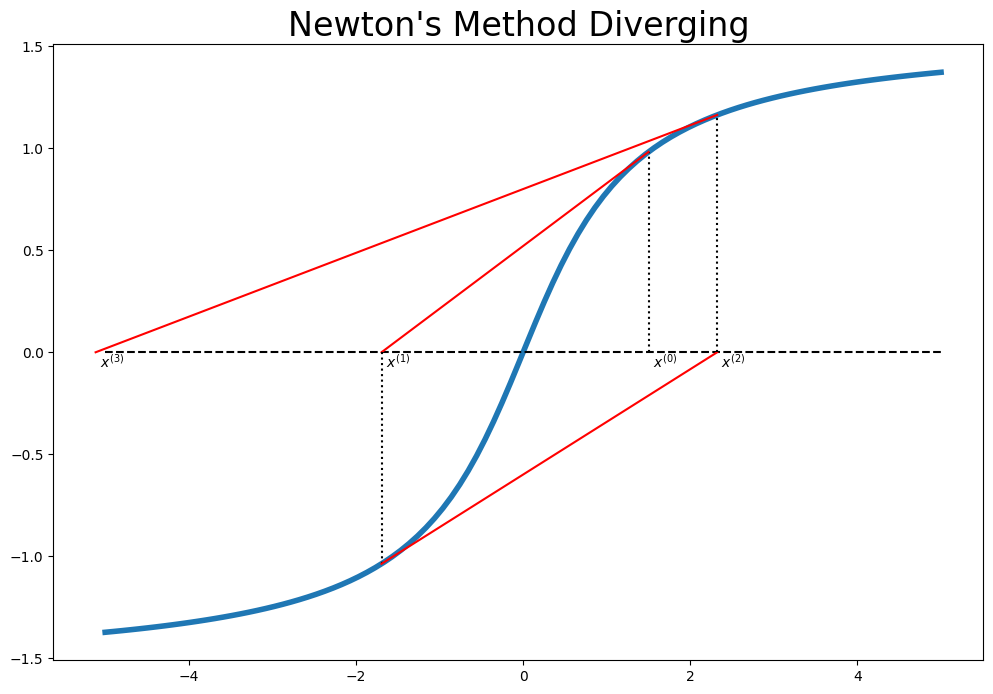

In [5]:
plt.figure(figsize=(12,8))
plt.style.use('default')

x = np.linspace(-5,5,100)
plt.plot(x, np.arctan(x), linewidth=4)
plt.plot(x,[0]*len(x),'k--')
plt.title("Newton's Method Diverging", fontdict={'fontsize': 24})

x0 = 1.5
x = tf.Variable(x0, dtype=np.float32)
plt.text(x, 0, ' $x^{(0)}$', verticalalignment='top')
for t in range(1,4):

    with tf.GradientTape() as t2:
        with tf.GradientTape() as t1:
            y = x*tf.math.atan(x) - 0.5*tf.math.log(1+x**2)
            # dy/dx = arctan(x) # oh, okay
            # ddy/dxdx = 1/(1+x^2) # oh, nice
            # but who cares to remember this when
            # tf can just numerically differentiated it

        # Compute the gradient inside the outer `t2` context manager
        # which means the gradient computation is differentiable as well.
        dy_dx = t1.gradient(y, x)
      
    # https://www.tensorflow.org/guide/advanced_autodiff#higher-order_gradients    
    d2y_dx2 = t2.gradient(dy_dx, x)

    x_t = tf.Variable(x - dy_dx/d2y_dx2)
    plt.plot([x, x], [0,dy_dx], 'k:')
    plt.plot([x,x_t], [dy_dx,0], c='r')
    plt.text(x_t, 0, ' $x^{('+str(t)+')}$', verticalalignment='top')
    x = x_t

*This example was inspired by [this figure](http://amsi.org.au/ESA_Senior_Years/imageSenior/2a_numerical_methods_graph_7.png) from [this tutorial](http://amsi.org.au/ESA_Senior_Years/SeniorTopic3/3j/3j_2content_2.html) from the Austalian Mathematical Science Institute, and the discussions regarding convergence in Chapter 2.1.1 **Newton's Method** of the Givens and Hoeting **Computational Statistics** textbook (pages 27-29).*

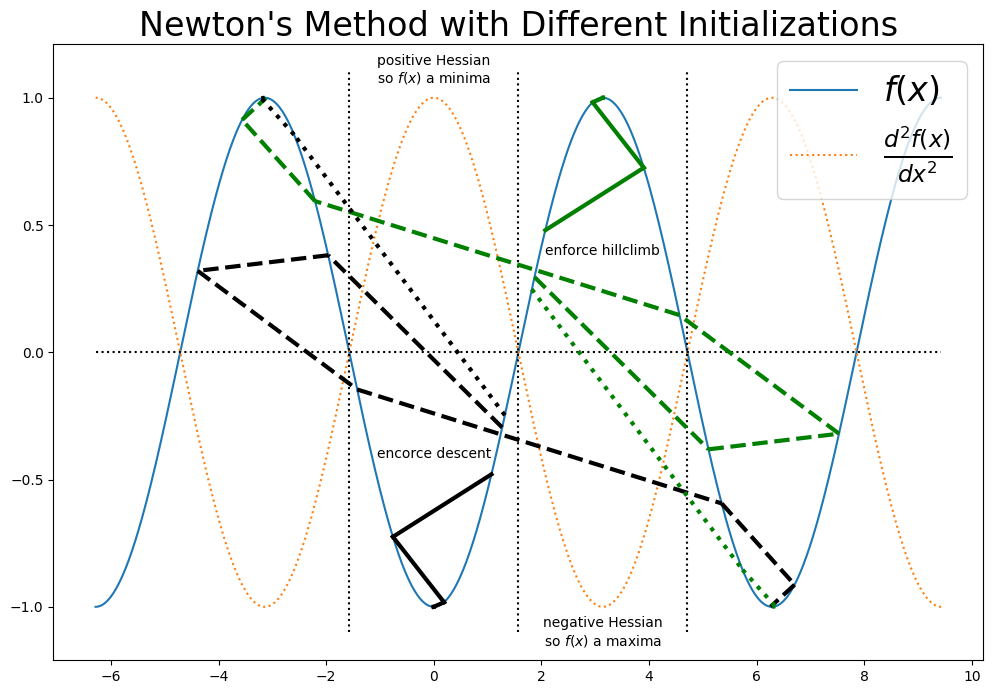

In [6]:
f = lambda x: -np.cos(x)
dfdx = lambda x: np.sin(x)
d2fdx2 = lambda x: np.cos(x)

x = np.linspace(-2*np.pi,3*np.pi,1000)
plt.figure(figsize=(12,8))
plt.plot(x,f(x), label='$f(x)$')
plt.plot(x,d2fdx2(x), ':', label='$\\frac{d^2f(x)}{dx^2}$')
plt.legend(fontsize=24)
plt.title("Newton's Method with Different Initializations",
          fontdict={'fontsize': 24}) 
plt.plot(x, 0*x, 'k:')
plt.plot([np.pi/2]*2, [-1.1,1.1], 'k:')
plt.plot([-np.pi/2]*2, [-1.1,1.1], 'k:')
plt.plot([1.5*np.pi]*2, [-1.1,1.1], 'k:')

plt.text(0, 1.11, 'positive Hessian\nso $f(x)$ a minima', 
         horizontalalignment='center', verticalalignment='center')
plt.text(2*np.pi/2, -1.1, 'negative Hessian\nso $f(x)$ a maxima', 
         horizontalalignment='center', verticalalignment='center')
plt.text(2*np.pi/2, .4, 'enforce hillclimb', 
         horizontalalignment='center', verticalalignment='center')
plt.text(0, -.4, 'encorce descent', 
         horizontalalignment='center', verticalalignment='center')

for x,style in zip([np.pi/2-.5, np.pi/2+.5, 
              np.pi/2-.3, np.pi/2+.3, 
              np.pi/2-.25, np.pi/2+.25], ['k','g','k--','g--','k:','g:']):
    for i in range(6):#0
        alpha=1#.1
        x_t = x - alpha*dfdx(x)/(d2fdx2(x)-0)
        plt.plot([x,x_t], [f(x),f(x_t)], style, linewidth=3)
        x = x_t

<a name="cell-opt-fx-newton-mulit1"></a>

## 7.3.A Newton's Method for Mulitivariate Functions ([Return to TOC](#cell-TOC-opt)) 

---

 ***Newton's Method*** for ***scalar valued*** $g(x)$ with $x$ in ${\rm I\!R}^d$ vector update is

$$x^{(t+1)} = x^{(t)} - \left[H_{g(x^{(t)})}\right]^{-1}\nabla_xg(x^{(t)})\quad \text{ in place of } \quad x^{(t+1)} = x^{(t)} - \frac{g'(x^{(t)})}{g''(x^{(t)})}$$

<font style="color:white">which is analogous derived from the multivariate generalization of the ***second order Taylor series expansion***</font>

<font style="color:white">$$\begin{align*}
g(x^*) \approx {} & g(x^{(t)}) + (x^*- x^{(t)})^T\nabla_x g(x^{(t)}) + \frac{1}{2}(x^*- x^{(t)})^T H_{g(x)}(x^{(t)})(x^*- x^{(t)})\\
\nabla_{x^*}g(x^*) \approx {} & \nabla_{x^*}\left[ g(x^{(t)}) + (x^*- x^{(t)})^T\nabla_x g(x^{(t)}) + \frac{1}{2}(x^*- x^{(t)})^T H_{g(x^{(t)})}(x^*- x^{(t)}) \right]\\
= {} & \nabla_x g(x^{(t)}) + H_{(x^{(t)})}(x^*- x^{(t)}) = 0\\ 
\Longrightarrow x^{(t+1)} = {} &  x^{(t)} - H_{g(x^{(t)})}^{-1} \nabla_x g(x^{(t)}) 
\end{align*}$$</font>

<font style="color:white">The direction of the update is calculated by
solving for $d$ in $\quad H_{g(x^{(t)})}\,d= \nabla_x g(x^{(t)})$</font>

<font style="color:white">rather than actually inverting the $H_{g(x^{(t)})}$ ***Hessian*** matrix (and the ***condition*** of $H_{g(x^{(t)})}$ is relevant for ***numerical accuracy***)</font>

- <font style="color:white">- A ***Newton-like*** method adds ***step size factor*** $\alpha$ for possible ***backtracking*** or improved ***line search***</font>

- <font style="color:white">[STA410_W24_Week7_Homework_NewtonsMethod.ipynb] will apply ***Newton's method*** to a scalar valued multivariate function</font>

<a name="cell-opt-fx-newton-mulit3"></a>

## 7.3.A Newton's Method for Mulitivariate Functions ([Return to TOC](#cell-TOC-opt)) 

---

 ***Newton's Method*** for ***scalar valued*** $g(x)$ with $x$ in ${\rm I\!R}^d$ vector update is

$$x^{(t+1)} = x^{(t)} - \left[H_{g(x^{(t)})}\right]^{-1}\nabla_xg(x^{(t)})\quad \text{ in place of } \quad x^{(t+1)} = x^{(t)} - \frac{g'(x^{(t)})}{g''(x^{(t)})}$$

which is analogous derived from the multivariate generalization of the ***second order Taylor series expansion***

$$\begin{align*}
g(x^*) \approx {} & g(x^{(t)}) + (x^*- x^{(t)})^T\nabla_x g(x^{(t)}) + \frac{1}{2}(x^*- x^{(t)})^T H_{g(x)}(x^{(t)})(x^*- x^{(t)})\\
\nabla_{x^*}g(x^*) \approx {} & \nabla_{x^*}\left[ g(x^{(t)}) + (x^*- x^{(t)})^T\nabla_x g(x^{(t)}) + \frac{1}{2}(x^*- x^{(t)})^T H_{g(x^{(t)})}(x^*- x^{(t)}) \right]\\
= {} & \nabla_x g(x^{(t)}) + H_{(x^{(t)})}(x^*- x^{(t)}) = 0\\ 
\Longrightarrow x^{(t+1)} = {} &  x^{(t)} - H_{g(x^{(t)})}^{-1} \nabla_x g(x^{(t)}) 
\end{align*}$$

The direction of the update is calculated by
solving for $d$ in $\quad H_{g(x^{(t)})}\,d= \nabla_x g(x^{(t)})$

rather than actually inverting the $H_{g(x^{(t)})}$ ***Hessian*** matrix <font style="color:white">(and the ***condition*** of $H_{g(x^{(t)})}$ is relevant for ***numerical accuracy***)</font>

- <font style="color:white">- A ***Newton-like*** method adds ***step size factor*** $\alpha$ for possible ***backtracking*** or improved ***line search***</font>

- <font style="color:white">[STA410_W24_Week7_Homework_NewtonsMethod.ipynb] will apply ***Newton's method*** to a scalar valued multivariate function</font>

<a name="cell-opt-fx-newton-mulit"></a>

## 7.3.A Newton's Method for Mulitivariate Functions ([Return to TOC](#cell-TOC-opt)) 

---

 ***Newton's Method*** for ***scalar valued*** $g(x)$ with $x$ in ${\rm I\!R}^d$ vector update is

$$x^{(t+1)} = x^{(t)} - \left[H_{g(x^{(t)})}\right]^{-1}\nabla_xg(x^{(t)})\quad \text{ in place of } \quad x^{(t+1)} = x^{(t)} - \frac{g'(x^{(t)})}{g''(x^{(t)})}$$

which is analogous derived from the multivariate generalization of the ***second order Taylor series expansion***

$$\begin{align*}
g(x^*) \approx {} & g(x^{(t)}) + (x^*- x^{(t)})^T\nabla_x g(x^{(t)}) + \frac{1}{2}(x^*- x^{(t)})^T H_{g(x)}(x^{(t)})(x^*- x^{(t)})\\
\nabla_{x^*}g(x^*) \approx {} & \nabla_{x^*}\left[ g(x^{(t)}) + (x^*- x^{(t)})^T\nabla_x g(x^{(t)}) + \frac{1}{2}(x^*- x^{(t)})^T H_{g(x^{(t)})}(x^*- x^{(t)}) \right]\\
= {} & \nabla_x g(x^{(t)}) + H_{(x^{(t)})}(x^*- x^{(t)}) = 0\\ 
\Longrightarrow x^{(t+1)} = {} &  x^{(t)} - H_{g(x^{(t)})}^{-1} \nabla_x g(x^{(t)}) 
\end{align*}$$

The direction of the update is calculated by
solving for $d$ in $\quad H_{g(x^{(t)})}\,d= \nabla_x g(x^{(t)})$

rather than actually inverting the $H_{g(x^{(t)})}$ ***Hessian*** matrix (and the ***condition*** of $H_{g(x^{(t)})}$ is relevant for ***numerical accuracy***)

- A ***Newton-like*** method adds ***step size factor*** $\alpha$ for possible ***backtracking*** or improved ***line search***

- [STA410_W24_Week7_CodingDemo_and_Homework_Optimization.ipynb]() will apply ***Newton's method*** to a scalar valued multivariate function